# Telecom Churn Prediction 

**Team:** Sanchita Patil, Sandeep

# 0. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

# Step 1 : Data Reading and Preparation

## i> Data Reading and Understanding

In [5]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,StackingClassifier,ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from imblearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
# Set environment settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

Next, we load our datasets and the data dictionary file.

The **train.csv** file contains both dependent and independent features, while the **test.csv** contains only the independent variables. 

So, for model selection, I will create our own train/test dataset from the **train.csv** and use the model to predict the solution using the features in unseen test.csv data for submission.

In [8]:
#Importing dataset

data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [9]:
# Inspecting the data dictionary
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belongs to
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile to mobile
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [10]:
# Inspecting the train dataset
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [11]:
# Inspecting the test dataset
unseen.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [12]:
#Preview of the First 10 Rows of the training data
data.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,

In [13]:
#Preview of the First 10 Rows of the test data
unseen.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.00,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.00,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.00,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.00,0.00,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.00,0.00,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.00,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.00,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.00,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.00,0.00,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,2

In [14]:
# Statistics summary of the train dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69999.0,34999.000000,20207.115084,0.000,17499.5000,34999.000,52498.5000,69998.000
circle_id,69999.0,109.000000,0.000000,109.000,109.0000,109.000,109.0000,109.000
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
std_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
arpu_6,69999.0,283.134365,334.213918,-2258.709,93.5810,197.484,370.7910,27731.088
arpu_7,69999.0,278.185912,344.366927,-1289.715,86.7140,191.588,365.3695,35145.834
arpu_8,69999.0,278.858826,351.924315,-945.808,84.0950,192.234,369.9090,33543.624
onnet_mou_6,67231.0,133.153275,299.963093,0.000,7.4100,34.110,119.3900,7376.710
onnet_mou_7,67312.0,133.894438,311.277193,0.000,6.6750,32.280,115.8375,8157.780


In [15]:
# Statistics summary of the train dataset
unseen.describe().T

,count,mean,std,min,25%,50%,75%,max
id,30000.0,84998.500000,8660.398374,69999.000,77498.75000,84998.5000,92498.25000,99998.000
circle_id,30000.0,109.000000,0.000000,109.000,109.00000,109.0000,109.00000,109.000
loc_og_t2o_mou,29684.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
std_og_t2o_mou,29684.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
loc_ic_t2o_mou,29684.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
arpu_6,30000.0,282.644348,314.560212,-185.043,92.90750,198.2275,371.96925,10955.066
arpu_7,30000.0,279.355021,323.205370,-2014.045,87.50475,191.7750,365.25075,13224.119
arpu_8,30000.0,279.845167,326.437029,-146.859,84.18050,191.6905,367.80475,13505.996
onnet_mou_6,28831.0,130.629693,290.677420,0.000,7.28000,34.7600,117.17000,6944.360
onnet_mou_7,28828.0,133.148632,302.921820,0.000,6.66000,32.5500,115.21000,7411.010


## ii> Data Cleaning and Preparation

### Checking columns with single unique value and dropping them

In [18]:
# Identify columns with a single unique value
cols_with_single_value = []
for col in data.columns:
    if data[col].nunique() == 1:
        cols_with_single_value.append(col)

print(cols_with_single_value)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


**Retaining 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8' Columns** : 'last_date_of_month_x' will always have a single value, which can limit their usefulness directly. However, we can derive features from the comparison between the last dates of the month and the last recharge dates at a later stage.

In [20]:
# List of columns to retain
retain_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']

In [21]:
# Drop columns with a single unique value except the ones we want to retain
cols_to_drop = [col for col in cols_with_single_value if col not in retain_cols]

In [22]:
# drop these columns with a single unique value from the training set - As such columns don't provide any meaningful information for analysis 
data = data.drop(columns=cols_to_drop)

In [23]:
data.shape

(69999, 162)

In [24]:
# drop these columns with a single unique value from the test set - As such columns don't provide any meaningful information for analysis 
unseen = unseen.drop(columns=cols_to_drop)

In [25]:
unseen.shape

(30000, 161)

In [26]:
# Remove the id column since it is unique for every row from the training set
data.drop('id', axis=1, inplace=True)

In [27]:
# Generating a list of column names based on their corresponding types

# now we can create some column name list by there types using description of columns

date_cols = ['date_of_last_rech_6',
            'date_of_last_rech_7',
            'date_of_last_rech_8',
            'date_of_last_rech_data_6',
            'date_of_last_rech_data_7',
            'date_of_last_rech_data_8',
             'last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8'
            ]

cat_cols = ['night_pck_user_6',
            'night_pck_user_7',
            'night_pck_user_8',
            'fb_user_6',
            'fb_user_7',
            'fb_user_8',
           ]

numerical_cols = [col for col in data.columns if col not in date_cols + cat_cols]
numerical_cols_test = [col for col in unseen.columns if col not in date_cols + cat_cols]


In [28]:
# print the number of columns in each list
print("#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(date_cols), len(numerical_cols), len(cat_cols)))

#Date cols:9
#Numeric cols:146
#Category cols:6


In [29]:
### Check for columns with more than 70% missing values in the training dataset
train_missing_values = round(100*(data.isna().sum(axis=0)/data.shape[0]), 2)
train_missing_values[train_missing_values > 70].sort_values(ascending=False)

date_of_last_rech_data_6    74.90
count_rech_2g_6             74.90
fb_user_6                   74.90
night_pck_user_6            74.90
arpu_2g_6                   74.90
arpu_3g_6                   74.90
count_rech_3g_6             74.90
av_rech_amt_data_6          74.90
max_rech_data_6             74.90
total_rech_data_6           74.90
arpu_3g_7                   74.48
count_rech_2g_7             74.48
fb_user_7                   74.48
count_rech_3g_7             74.48
date_of_last_rech_data_7    74.48
av_rech_amt_data_7          74.48
night_pck_user_7            74.48
max_rech_data_7             74.48
total_rech_data_7           74.48
arpu_2g_7                   74.48
arpu_2g_8                   73.69
date_of_last_rech_data_8    73.69
night_pck_user_8            73.69
max_rech_data_8             73.69
arpu_3g_8                   73.69
total_rech_data_8           73.69
av_rech_amt_data_8          73.69
count_rech_3g_8             73.69
count_rech_2g_8             73.69
fb_user_8     

### Imputing Missing Values

#### Missing Value Treatment Strategy

We have identified consistent patterns of missing data across several variables, indicating potentially meaningful absences. To handle this, we will group similar data for targeted analysis:

- **Recharge-related Data**: Group variables related to recharge activity and apply appropriate missing value treatments.
- **ARPU-related Data**: Group and address missing values in variables associated with Average Revenue Per User (ARPU).
- **Numerical Columns**: Apply specific missing value treatments for numerical variables, considering the significance of the missingness.Detect and remove extreme values that deviate significantly from the majority of the data.
- **Categorical Columns**: Apply specific missing value treatments for categorical variables, considering the significance of the missingness
- **Date Columns**: Standardization of date formats

By grouping these variables, we can apply customized strategies for each type, ensuring a more accurate and insightful preprocessing workflow.

#### Recharge-related Data

In [33]:
# List of columns to exclude
exclude_cols = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
                'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']

In [34]:
# Create recharge_cols excluding the columns in exclude_cols
recharge_cols = [col for col in data.columns if '_rech_' in col and col not in exclude_cols]
recharge_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [35]:
#As the minimum value is 1 we can impute the NA values by 0, considering there were no recharges done by the customer.
data[recharge_cols].describe(include='all')

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,7.566522,7.706667,7.224932,328.139788,322.376363,323.846355,104.569265,104.137573,107.540351,2.467612,2.679989,2.652441,126.500000,126.402071,125.374925,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,192.831096,201.455940,196.815792
std,7.041452,7.050614,7.195597,404.211068,411.070120,426.181405,121.407701,120.782543,124.396750,2.794610,3.073472,3.101265,109.352573,109.459266,109.648799,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,190.623115,198.346141,192.280532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,110.000000,100.000000,90.000000,30.000000,30.000000,30.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,82.000000,92.000000,84.000000
50%,6.000000,6.000000,5.000000,229.000000,220.000000,225.000000,110.000000,110.000000,98.000000,1.000000,2.000000,1.000000,145.000000,145.000000,145.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000
75%,9.000000,10.000000,9.000000,438.000000,430.000000,436.000000,120.000000,128.000000,144.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000
max,170.000000,138.000000,138.000000,35190.000000,40335.000000,45320.000000,4010.000000,3299.000000,4449.000000,61.000000,54.000000,60.000000,1555.000000,1555.000000,1555.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,5920.000000,4365.000000,4076.000000


In [36]:
# Replacing NaN values in recharge related columns with 0 in the training set
data[recharge_cols] = data[recharge_cols].fillna(0)

In [37]:
## now we have to  make sure the values are imputed correctly for that we can check "Missing value ratio" in the training set
data[recharge_cols].isnull().sum()*100/data.shape[1]

total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64

In [38]:
# Replacing NaN values in recharge related columns with 0 in the test set
unseen[recharge_cols] = unseen[recharge_cols].fillna(0)

In [39]:
#As the minimum value is 1 we can impute the NA values by 0, considering there were no recharges done by the customer in the test set.
unseen[recharge_cols].describe(include='all')

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,7.540800,7.685667,7.184867,326.055900,324.331700,324.882233,104.796667,106.186967,108.166533,0.620700,0.676833,0.700033,31.894033,32.747533,33.407933,0.471067,0.51830,0.532600,0.149633,0.158533,0.167433,48.561194,51.342741,52.596458
std,7.163973,7.116522,7.222790,383.187192,401.136032,393.132804,118.746309,132.835730,132.566216,1.757138,1.879782,1.939874,76.614487,78.976636,79.023333,1.528978,1.62506,1.648442,0.685219,0.749057,0.743114,129.640618,131.180208,130.929389
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,104.000000,100.000000,90.000000,30.000000,30.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,6.000000,5.000000,230.000000,220.000000,225.000000,110.000000,110.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,10.000000,9.000000,436.250000,426.000000,432.000000,120.000000,128.000000,144.000000,1.000000,1.000000,1.000000,14.000000,17.000000,17.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,14.000000,17.000000,23.000000
max,307.000000,110.000000,196.000000,18500.000000,19000.000000,14000.000000,3150.000000,4010.000000,4449.000000,55.000000,44.000000,57.000000,1555.000000,1555.000000,1555.000000,39.000000,31.00000,34.000000,28.000000,35.000000,30.000000,7546.000000,3765.000000,2520.000000


In [40]:
# Replacing NaN values in recharge related columns with 0 in the test set
unseen[recharge_cols] = unseen[recharge_cols].fillna(0)

In [41]:
## now we have to  make sure the values are imputed correctly for that we can check "Missing value ratio" in the test set
unseen[recharge_cols].isnull().sum()*100/unseen.shape[1]

total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64

#### ARPU (Average revenue per user)-Related Data

In [43]:
# Columns with 'arpu' information 
arpu_cols = data.columns[data.columns.str.contains('arpu_')]
print(arpu_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')


In [44]:
data[arpu_cols].describe(include='all')

,arpu_6,arpu_7,arpu_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8
count,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,283.134365,278.185912,278.858826,90.069931,89.115767,90.618564,86.863900,85.846074,86.348404
std,334.213918,344.366927,351.924315,193.600413,195.826990,189.907986,171.321203,178.067280,170.297094
min,-2258.709000,-1289.715000,-945.808000,-20.380000,-26.040000,-24.490000,-35.830000,-13.090000,-55.830000
25%,93.581000,86.714000,84.095000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,197.484000,191.588000,192.234000,0.520000,0.420000,0.840000,11.300000,8.800000,9.090000
75%,370.791000,365.369500,369.909000,122.070000,120.860000,122.070000,122.070000,122.070000,122.070000
max,27731.088000,35145.834000,33543.624000,5054.370000,4980.900000,3716.900000,5054.350000,4809.360000,3483.170000


In [45]:
# Check the proportion of missing values for ARPU columns
missing_proportions = data[arpu_cols].isnull().mean()
print("Missing value proportions:\n", missing_proportions)

Missing value proportions:
 arpu_6       0.000000
arpu_7       0.000000
arpu_8       0.000000
arpu_3g_6    0.749025
arpu_3g_7    0.744782
arpu_3g_8    0.736896
arpu_2g_6    0.749025
arpu_2g_7    0.744782
arpu_2g_8    0.736896
dtype: float64


In [46]:
# Replacing NaN values in ARPU related columns with median in the training set.
#For columns with high proportions of missing values (e.g., greater than 70%), imputation with a meaningful value such as the median 
#is generally preferable as it provides a central tendency measure that is less affected by outliers and avoids artificially skewing 
#the data with zeros.
data[arpu_cols] = data[arpu_cols].fillna(data[arpu_cols].median())
print(data[arpu_cols].isnull().sum()*100/data.shape[1])

arpu_6       0.0
arpu_7       0.0
arpu_8       0.0
arpu_3g_6    0.0
arpu_3g_7    0.0
arpu_3g_8    0.0
arpu_2g_6    0.0
arpu_2g_7    0.0
arpu_2g_8    0.0
dtype: float64


In [47]:
# Replacing NaN values in ARPU related columns with 0 in the test set
unseen[arpu_cols] = unseen[arpu_cols].fillna(unseen[arpu_cols].median())
print(unseen[arpu_cols].isnull().sum()*100/unseen.shape[1])

arpu_6       0.0
arpu_7       0.0
arpu_8       0.0
arpu_3g_6    0.0
arpu_3g_7    0.0
arpu_3g_8    0.0
arpu_2g_6    0.0
arpu_2g_7    0.0
arpu_2g_8    0.0
dtype: float64


#### Numerical Columns

#### Missing value Imputation

In [50]:
# Checking for numerical columns having missing values present in training set
data[numerical_cols].isnull().sum()*100/data.shape[0]

arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           3.954342
onnet_mou_7           3.838626
onnet_mou_8           5.290076
offnet_mou_6          3.954342
offnet_mou_7          3.838626
offnet_mou_8          5.290076
roam_ic_mou_6         3.954342
roam_ic_mou_7         3.838626
roam_ic_mou_8         5.290076
roam_og_mou_6         3.954342
roam_og_mou_7         3.838626
roam_og_mou_8         5.290076
loc_og_t2t_mou_6      3.954342
loc_og_t2t_mou_7      3.838626
loc_og_t2t_mou_8      5.290076
loc_og_t2m_mou_6      3.954342
loc_og_t2m_mou_7      3.838626
loc_og_t2m_mou_8      5.290076
loc_og_t2f_mou_6      3.954342
loc_og_t2f_mou_7      3.838626
loc_og_t2f_mou_8      5.290076
loc_og_t2c_mou_6      3.954342
loc_og_t2c_mou_7      3.838626
loc_og_t2c_mou_8      5.290076
loc_og_mou_6          3.954342
loc_og_mou_7          3.838626
loc_og_mou_8          5.290076
std_og_t2t_mou_6      3.954342
std_og_t2t_mou_7      3.838626
std_og_t

In [51]:
# Imputing missing values present in numerical columns with median in the training set
data[numerical_cols] = data[numerical_cols].apply(lambda x: x.fillna(x.median()))

In [52]:
# Again checking for the missing values in numerical columns of training set
data[numerical_cols].isnull().sum()*100/data.shape[0]

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_m

In [53]:
# Checking for numerical columns having missing values present in test set
unseen[numerical_cols_test].isnull().sum()*100/data.shape[0]

id                    0.000000
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           1.670024
onnet_mou_7           1.674310
onnet_mou_8           2.392891
offnet_mou_6          1.670024
offnet_mou_7          1.674310
offnet_mou_8          2.392891
roam_ic_mou_6         1.670024
roam_ic_mou_7         1.674310
roam_ic_mou_8         2.392891
roam_og_mou_6         1.670024
roam_og_mou_7         1.674310
roam_og_mou_8         2.392891
loc_og_t2t_mou_6      1.670024
loc_og_t2t_mou_7      1.674310
loc_og_t2t_mou_8      2.392891
loc_og_t2m_mou_6      1.670024
loc_og_t2m_mou_7      1.674310
loc_og_t2m_mou_8      2.392891
loc_og_t2f_mou_6      1.670024
loc_og_t2f_mou_7      1.674310
loc_og_t2f_mou_8      2.392891
loc_og_t2c_mou_6      1.670024
loc_og_t2c_mou_7      1.674310
loc_og_t2c_mou_8      2.392891
loc_og_mou_6          1.670024
loc_og_mou_7          1.674310
loc_og_mou_8          2.392891
std_og_t2t_mou_6      1.670024
std_og_t

In [54]:
# Imputing missing values present in numerical columns with median in the test set
unseen[numerical_cols_test] = unseen[numerical_cols_test].apply(lambda x: x.fillna(x.median()))

In [55]:
# Again checking for the missing values in numerical columns of test set
unseen[numerical_cols_test].isnull().sum()*100/data.shape[0]

id                    0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_m

#### Categorical Columns

In [57]:
# Inspecting categorical columns
data[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  17568 non-null  float64
 1   night_pck_user_7  17865 non-null  float64
 2   night_pck_user_8  18417 non-null  float64
 3   fb_user_6         17568 non-null  float64
 4   fb_user_7         17865 non-null  float64
 5   fb_user_8         18417 non-null  float64
dtypes: float64(6)
memory usage: 3.2 MB


In [58]:
# To find the count of NaN values in each column in the training set
nan_counts = data[cat_cols].isna().mean() * 100
print(nan_counts)

night_pck_user_6    74.902499
night_pck_user_7    74.478207
night_pck_user_8    73.689624
fb_user_6           74.902499
fb_user_7           74.478207
fb_user_8           73.689624
dtype: float64


#### Why Replace `NaN` with `-1` in Categorical Columns?

1. **Representation of Missingness**:  
   `-1` serves as a clear placeholder for missing values, explicitly marking unknown or absent data.

2. **Machine Learning Compatibility**:  
   Many models can't handle `NaN` values directly. Replacing with `-1` ensures algorithms can process missing data as a distinct category.

3. **Categorical Feature Encoding**:  
   Using `-1` allows missing values to be treated as a unique category when encoding techniques like label encoding or one-hot encoding are applied.

4. **Avoiding Bias**:  
   `-1` prevents the introduction of bias that could occur by imputing missing values with frequent or arbitrary values, allowing the model to treat missing data separately.


In [60]:
# Replacing NaN values in categorical related columns with -1 in the training set.
# As we can see that the columns listed in `cat_cols` are of the `float64` data type.
data[cat_cols] = data[cat_cols].fillna(-1).astype('category')

In [61]:
# We'll need to convert them to the `category` data type and also check if there are any NaN values.
data[cat_cols].isnull().sum()*100/data.shape[1]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

In [62]:
# Verifying the change in dtype on the train set
data[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  69999 non-null  category
 1   night_pck_user_7  69999 non-null  category
 2   night_pck_user_8  69999 non-null  category
 3   fb_user_6         69999 non-null  category
 4   fb_user_7         69999 non-null  category
 5   fb_user_8         69999 non-null  category
dtypes: category(6)
memory usage: 411.1 KB


In [63]:
# Replacing NaN values in categorical related columns with -1 in the test set.
# As we can see that the columns listed in `cat_cols` are of the `float64` data type.
unseen[cat_cols] = unseen[cat_cols].fillna(-1).astype('category')

In [64]:
# We'll need to convert them to the `category` data type and also check if there are any NaN values in the test set.
unseen[cat_cols].isnull().sum()*100/data.shape[1]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

In [65]:
# Verifying the change in dtype on the test set
unseen[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  30000 non-null  category
 1   night_pck_user_7  30000 non-null  category
 2   night_pck_user_8  30000 non-null  category
 3   fb_user_6         30000 non-null  category
 4   fb_user_7         30000 non-null  category
 5   fb_user_8         30000 non-null  category
dtypes: category(6)
memory usage: 176.7 KB


### Date Columns

In [67]:
# Check for missing values in date columns
missing_values = data[date_cols].isna().sum()
print("Missing values in date columns:\n", missing_values)

# Percentage of missing values
missing_percentage = data[date_cols].isna().mean() * 100
print("\nPercentage of missing values:\n", missing_percentage)

Missing values in date columns:
 date_of_last_rech_6          1101
date_of_last_rech_7          1234
date_of_last_rech_8          2461
date_of_last_rech_data_6    52431
date_of_last_rech_data_7    52134
date_of_last_rech_data_8    51582
last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
dtype: int64

Percentage of missing values:
 date_of_last_rech_6          1.572880
date_of_last_rech_7          1.762882
date_of_last_rech_8          3.515765
date_of_last_rech_data_6    74.902499
date_of_last_rech_data_7    74.478207
date_of_last_rech_data_8    73.689624
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
dtype: float64


In [68]:
# Check a sample of the date columns to understand their format
for col in date_cols:
    print(f"Sample values from {col}:\n", data[col].head())

Sample values from date_of_last_rech_6:
 0    6/22/2014
1    6/12/2014
2    6/11/2014
3    6/15/2014
4    6/25/2014
Name: date_of_last_rech_6, dtype: object
Sample values from date_of_last_rech_7:
 0    7/10/2014
1    7/10/2014
2    7/22/2014
3    7/21/2014
4    7/26/2014
Name: date_of_last_rech_7, dtype: object
Sample values from date_of_last_rech_8:
 0    8/24/2014
1    8/26/2014
2    8/24/2014
3    8/25/2014
4    8/30/2014
Name: date_of_last_rech_8, dtype: object
Sample values from date_of_last_rech_data_6:
 0          NaN
1          NaN
2          NaN
3          NaN
4    6/25/2014
Name: date_of_last_rech_data_6, dtype: object
Sample values from date_of_last_rech_data_7:
 0          NaN
1     7/8/2014
2          NaN
3          NaN
4    7/23/2014
Name: date_of_last_rech_data_7, dtype: object
Sample values from date_of_last_rech_data_8:
 0          NaN
1          NaN
2          NaN
3          NaN
4    8/20/2014
Name: date_of_last_rech_data_8, dtype: object
Sample values from last_date

In [69]:
# Convert all date columns to a standard format - training dataset
for col in date_cols:
    # Use the correct format for conversion
    data[col] = pd.to_datetime(data[col], errors='coerce', format='%m/%d/%Y')

In [70]:
# Convert all date columns to a standard format - test dataset
for col in date_cols:
    # Use the correct format for conversion
    unseen[col] = pd.to_datetime(unseen[col], errors='coerce', format='%m/%d/%Y')

In [71]:
# List of columns to drop
cols_to_drop = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']

In [72]:
# Drop the columns from the training dataset
data = data.drop(columns=cols_to_drop)

In [73]:
data.shape

(69999, 158)

In [74]:
# Drop the columns from the test dataset
unseen = unseen.drop(columns=cols_to_drop)

In [75]:
unseen.shape

(30000, 158)

In [76]:
# Feature 1: Days since last recharge (based on the last date of the month)  - training data
# We can use the last date of the month to calculate the days since the last recharge
data['days_since_last_rech_6'] = (data['last_date_of_month_6'] - data['date_of_last_rech_6']).dt.days
data['days_since_last_rech_7'] = (data['last_date_of_month_7'] - data['date_of_last_rech_7']).dt.days
data['days_since_last_rech_8'] = (data['last_date_of_month_8'] - data['date_of_last_rech_8']).dt.days

In [77]:
# Feature 1: Days since last recharge (based on the last date of the month) - test data
# We can use the last date of the month to calculate the days since the last recharge
unseen['days_since_last_rech_6'] = (unseen['last_date_of_month_6'] - unseen['date_of_last_rech_6']).dt.days
unseen['days_since_last_rech_7'] = (unseen['last_date_of_month_7'] - unseen['date_of_last_rech_7']).dt.days
unseen['days_since_last_rech_8'] = (unseen['last_date_of_month_8'] - unseen['date_of_last_rech_8']).dt.days

In our analysis, we discovered that missing values in last_date_of_month_7 and last_date_of_month_8 are strongly associated with a churn probability of 1. By introducing a binary flag (1 for missing, 0 for non-missing), we're preserving this valuable information. The binary feature captures the direct relationship between the absence of data and the likelihood of churn.

In [79]:
# Additional Feature: Flag whether 'last_date_of_month' was missing - training data
data['last_date_of_month_7_missing'] = data['last_date_of_month_7'].isnull().astype(int)
data['last_date_of_month_8_missing'] = data['last_date_of_month_8'].isnull().astype(int)

In [80]:
# Additional Feature: Flag whether 'last_date_of_month' was missing - test data
unseen['last_date_of_month_7_missing'] = unseen['last_date_of_month_7'].isnull().astype(int)
unseen['last_date_of_month_8_missing'] = unseen['last_date_of_month_8'].isnull().astype(int)

In [81]:
# Handle missing values by setting them to a specific value, e.g., -1 - training data
data.fillna({
    'days_since_last_rech_6': -1,
    'days_since_last_rech_7': -1,
    'days_since_last_rech_8': -1
}, inplace=True)

In [82]:
# Handle missing values by setting them to a specific value, e.g., -1 - test data
unseen.fillna({
    'days_since_last_rech_6': -1,
    'days_since_last_rech_7': -1,
    'days_since_last_rech_8': -1
}, inplace=True)

In [83]:
# Drop original date columns if they are no longer needed - training data
data.drop(columns=[
    'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
    'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'
], inplace=True)

In [84]:
# Drop original date columns if they are no longer needed - test data
unseen.drop(columns=[
    'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
    'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'
], inplace=True)

In [85]:
data.shape

(69999, 157)

In [86]:
unseen.shape

(30000, 157)

# Step 2: Filter High-Value Customers

In this section, we will identify high-value customers based on their recharge amounts for the months of June and July.By focusing on the top 70% of customers based on recharge amounts, we can tailor models to high-value customers, helping to create effective retention strategies. Our goal is to focus on  customers who are experiencing usage-based churn. We will follow these steps:

1. **Define High-Value Customers**:
   - To identify high-value customers, we will select only the top 70% of customers based on their recharge amounts for June and July.
2. **Calculate Total Data Recharge Amount**:
   - We will create a new feature named `Total Data Recharge Amount`. This is calculated by multiplying the values of `total_rech_data` and `av_rech_amt_data`, which represent the total amount recharged by the customer for data usage.
   - Formula :
     Total Data Recharge Amount = `Total Data Recharge * Average Data Recharge Amount`
3. **Calculate Total Amount**:
   - We will also compute the `Total Amount` for the months of June and July by adding `Total Data Recharge Amount` and `Total Recharge Amount`.
   - Formula :
     Total Amount = `Total Data Recharge Amount + Total Recharge Amount`
4. **Compute Total Average Recharge Amount**:
   - Finally, we will calculate the `Total Average Recharge Amount` during the 'Good Phase', which includes the months of June and July.
   - Formula :
      `Total Average Amount =  Total Amount / 2`

In [89]:
# calculate the total Data Recharge amount for June and July in the training set
data['total_rech_data_amt_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_rech_data_amt_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']

In [90]:
# Calculate Total Amount for June and July in the training set
data['total_amt_6'] = data['total_rech_data_amt_6'] + data['total_rech_amt_6']
data['total_amt_7'] = data['total_rech_data_amt_7'] + data['total_rech_amt_7']

In [91]:
# Calculate Total Average Recharge Amount for June and July in the training set
data['total_avg_amt_6_7'] = data[['total_amt_6', 'total_amt_7']].mean(axis=1)

In [92]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(data.total_avg_amt_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


In [93]:
# retain only those customers who have recharged with more than or equal to 70th percentile amount
train_data_filtered = data.loc[data.total_avg_amt_6_7 >= data.total_avg_amt_6_7.quantile(0.7), :]
train_data_filtered = train_data_filtered.reset_index(drop=True)

In [94]:
train_data_filtered.shape

(21013, 162)

In [95]:
# delete variables created to filter high-value customers in train data
train_data_filtered = train_data_filtered.drop(['total_rech_data_amt_6', 'total_rech_data_amt_7',
                                      'total_amt_6', 'total_amt_7', 'total_avg_amt_6_7'], axis=1)

In [96]:
train_data_filtered.shape

(21013, 157)

In [97]:
unseen.shape

(30000, 157)

After filtering the customers based on the 70th percentile recharge value, we are left with **30,000 rows and 157 columns**. These represent the high-value customers whose recharge amounts are greater than or equal to the 70th percentile threshold. 

Going forward, all subsequent analyses and operations will focus exclusively on this subset of **30,000 high-value customers**.

# Step 3: EDA and Analysing the target variable churn_probability

In [100]:
# Checking datatype of target variable churn_probability in train dataset
train_data_filtered['churn_probability'].dtype

dtype('int64')

In [101]:
# Check the value counts of churn and not-churn
print(train_data_filtered['churn_probability'].value_counts())

print('-------------------------------------------------')

# Calculate churn ratio
# print('Churn ratio:')
# print(train_data_filtered['churn_probability'].value_counts()*100/train_data_filtered.shape[0])

0    19274
1     1739
Name: churn_probability, dtype: int64
-------------------------------------------------


Based on the visualization, it's evident that 91.72% of customers are non-churn, while 8.27% of customers churn.This indicates a noticeable class imbalance,, which we will address later.

We can also create new columns for the defining the good phase variables and drop the seperate 6th,7th and 8th month variables.
Before proceding to check the remaining missing value handling, let us check the collineartity of the indepedent variables and try to understand their dependencies.

#### Outlier Removal

In [105]:
def cap_outliers(array, k=3):
    if np.issubdtype(array.dtype, np.number):  # Check if the column is numeric
        upper_limit = array.mean() + k * array.std()
        lower_limit = array.mean() - k * array.std()
        # Cap values to the upper limit
        array[array > upper_limit] = upper_limit
        # Cap values to the lower limit
        array[array < lower_limit] = lower_limit
    return array

In [106]:
# Define the target variable column name
target_variable = 'churn_probability'

# Identify numerical columns excluding the target variable
numerical_cols = train_data_filtered.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove(target_variable)  # Exclude the target variable

# Create a copy of the training data
train_data_filtered1 = train_data_filtered.copy()

# Apply outlier capping to the numerical columns only (excluding the target variable)
train_data_filtered1[numerical_cols] = train_data_filtered[numerical_cols].apply(cap_outliers, axis=0)

# Ensure target variable remains as int
train_data_filtered1[target_variable] = train_data_filtered[target_variable].astype(int)

# Verify that the target variable remains unchanged
print(train_data_filtered1[target_variable].dtype)

int32


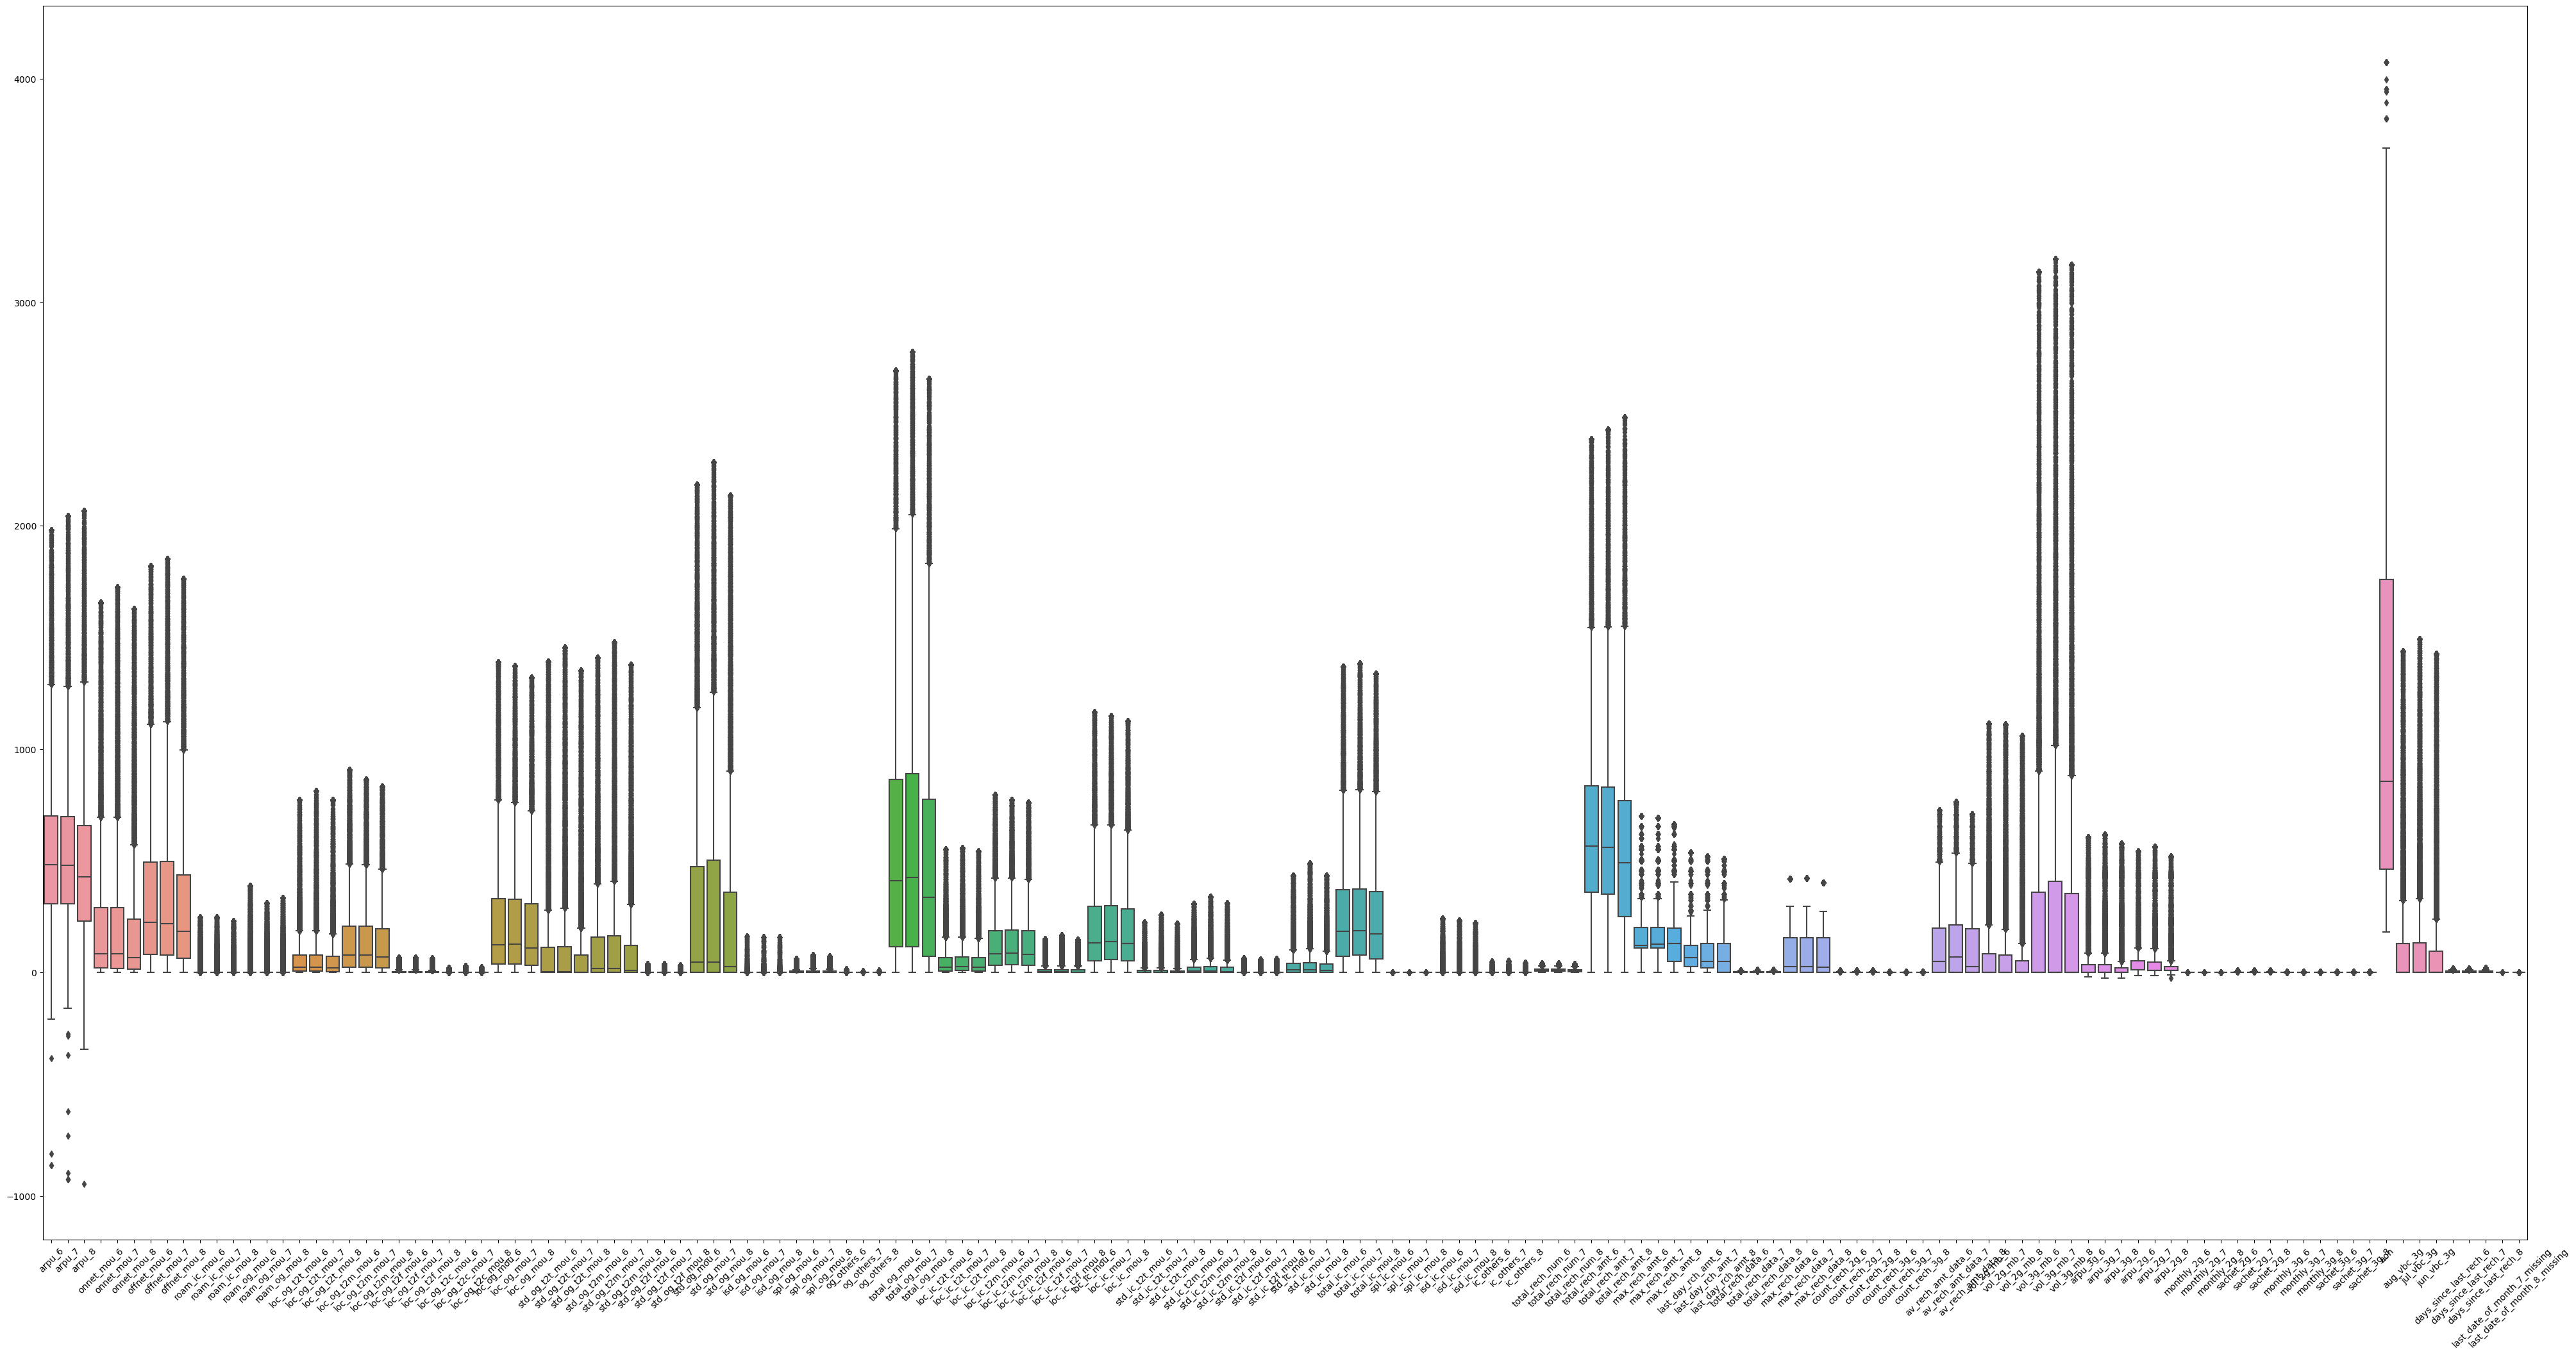

In [107]:
# Plot boxplots to visualize the impact of outlier capping
plt.figure(figsize=(50,25))
plt.xticks(rotation=45)
sns.boxplot(data=train_data_filtered1[numerical_cols])
plt.show()

In [108]:
train_data_filtered1.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,days_since_last_rech_6,days_since_last_rech_7,days_since_last_rech_8,last_date_of_month_7_missing,last_date_of_month_8_missing
count,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.00000

In [109]:
# creating a list of column names for each month - Train dataset
# mon_6_cols = [col for col in train_data_filtered1.columns if '_6' in col]
# mon_7_cols = [col for col in train_data_filtered1.columns if '_7' in col]
# mon_8_cols = [col for col in train_data_filtered1.columns if '_8' in col]

#### Correlation Analysis

In [111]:
# lets check the correlation amongst the independent variables - Train dataset
churn_corr = train_data_filtered1.corr()
churn_corr.loc[:,:] = np.tril(churn_corr, k=-1)
churn_corr = churn_corr.stack()
churn_corr
churn_corr[(churn_corr > 0.98) | (churn_corr < -0.98)].sort_values(ascending=False)

sachet_2g_7  count_rech_2g_7    0.981334
sachet_2g_8  count_rech_2g_8    0.981078
dtype: float64

The sachet_2g_7 and sachet_2g_8 columns, which track the usage of short-duration recharge plans, have a very high correlation (0.981) with count_rech_2g_7 and count_rech_2g_8, respectively. This indicates that the information they provide is largely redundant, as count_rech_2g_7 and count_rech_2g_8 already capture the number of such recharges. Including both sets of columns can introduce multicollinearity, which may affect model performance and interpretation. To reduce redundancy and improve model efficiency, sachet_2g_7 and sachet_2g_8 are being dropped.

In [113]:
# Training dataset - Dropping highly correlated features: max_rech_data_6 and max_rech_data_7
# as they are redundant with av_rech_amt_data_6 and av_rech_amt_data_7 respectively.
col_to_drop=['sachet_2g_7','sachet_2g_8']
# #  dropping these column
train_data_filtered1.drop(col_to_drop, axis=1, inplace=True)

In [114]:
# test dataset - Dropping highly correlated features: max_rech_data_6 and max_rech_data_7
# as they are redundant with av_rech_amt_data_6 and av_rech_amt_data_7 respectively.
unseen.drop(col_to_drop, axis=1, inplace=True)

In [115]:
train_data_filtered1.shape

(21013, 155)

In [116]:
unseen.shape

(30000, 155)

#### Feature engineering

In a telecom churn analysis, the tenure variable is often crucial for understanding customer behavior and predicting churn.
Tenure represents the length of time a customer has been with the company. It can provide insights into customer loyalty, satisfaction, and the likelihood of churn

In [119]:
# creating a new variable 'tenure' - Training dataset
train_data_filtered1['tenure'] = (train_data_filtered['aon']/30).round(0)

In [120]:
# Since we derived a new column from 'aon', we can drop it - Train dataset
train_data_filtered1.drop('aon',axis=1,inplace=True)

In [121]:
train_data_filtered1.shape

(21013, 155)

In [122]:
# creating a new variable 'tenure' - Test Datatset
unseen['tenure'] = (unseen['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it - Test dataset
unseen.drop('aon',axis=1, inplace=True)

In [123]:
unseen.shape

(30000, 155)

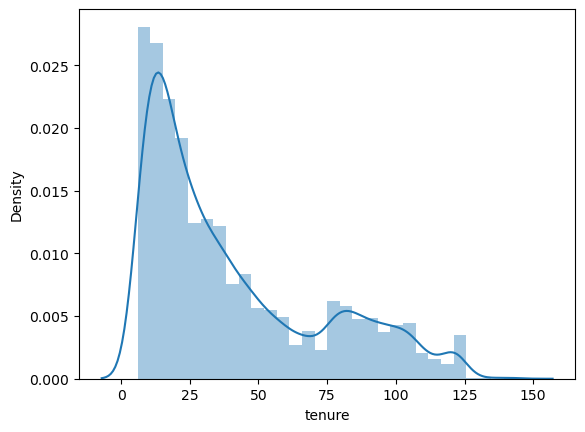

In [124]:
# Checking the distribution of the tenure variable - Train dataset
sns.distplot(train_data_filtered1['tenure'],bins=30)
plt.show()

#### Observation: 

Based on the description of the right-skewed distribution, we can infer the following:

1. **Majority of Customers:** A significant portion of customers have a relatively short tenure, possibly indicating a high churn rate in the initial stages.

2. **Long-Term Customers:** A smaller group of customers have a longer tenure, suggesting they are more loyal or satisfied with the service.

3. **Potential for Improvement:** The right-skewed shape might indicate opportunities to improve customer retention strategies for shorter-tenured customers, such as offering incentives or personalized promotions.


#### Categorical Tenure Ranges

To enhance analysis and interpretation, continuous tenure data has been binned into categorical ranges (`tenure_range`) in both the training (`train_data_filtered1`) and unseen datasets. This approach provides:

- **Improved Analysis:** Categorical variables are easier to analyze and visualize compared to continuous data.
- **Identifying Patterns:** Binning helps in spotting trends in churn probability associated with different tenure ranges.
- **Actionable Insights:** Understanding churn tendencies within specific tenure ranges allows for targeted retention strategies, such as focused promotions or loyalty programs.

In [127]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
train_data_filtered1['tenure_range'] = pd.cut(train_data_filtered1['tenure'], tn_range, labels=tn_label)
train_data_filtered1['tenure_range'].head()

0    1-2 Yrs
1    1-2 Yrs
2    1-2 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

In [128]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
unseen['tenure_range'] = pd.cut(unseen['tenure'], tn_range, labels=tn_label)
unseen['tenure_range'].head()

0        2-5 Yrs
1            NaN
2    6-12 Months
3        2-5 Yrs
4        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

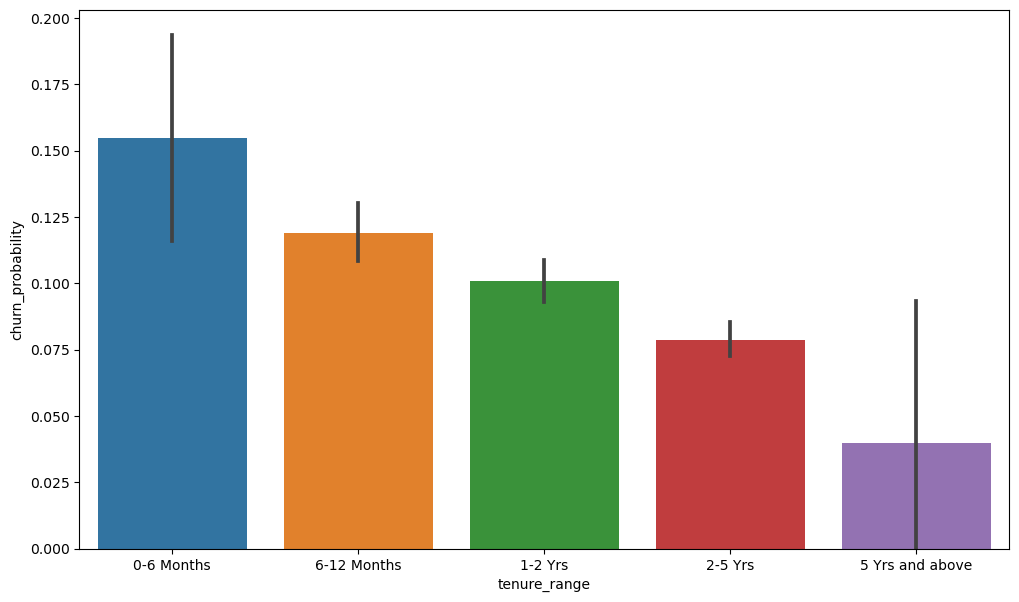

In [129]:
#Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn_probability', data=train_data_filtered1)
plt.show()

#### Observations on Churn by Tenure

- **Longer Tenure:** Customers with longer tenure tend to have a lower likelihood of churning.
- **Initial Tenure Ranges:** There may be a higher churn rate among customers with shorter tenures, such as those in the 0-6 months or 6-12 months ranges.

**ARPU** is a crucial metric in the telecom industry, reflecting the average revenue generated per user. Analyzing its distribution helps you visualize how this revenue is spread across the customer base.

In [132]:
# Calculate the average ARPU for months 6 and 7 and add it as a new column 'avg_arpu_6_7' to the filtered training data
train_data_filtered1["avg_arpu_6_7"]= (train_data_filtered1['arpu_6']+train_data_filtered1['arpu_7'])/2
train_data_filtered1['avg_arpu_6_7'].head()

0     184.4495
1     478.9215
2    1018.2270
3     362.0215
4     370.7370
Name: avg_arpu_6_7, dtype: float64

In [133]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data
train_data_filtered1.drop(['arpu_6','arpu_7'], axis=1,inplace=True)

In [134]:
# The curent dimension of the dataset after dropping few unwanted columns - Train dataset
train_data_filtered1.shape

(21013, 155)

In [135]:
# Calculate the average ARPU for months 6 and 7 and add it as a new column 'avg_arpu_6_7' to the test data
unseen["avg_arpu_6_7"]= (unseen['arpu_6']+unseen['arpu_7'])/2
unseen['avg_arpu_6_7'].head()

0     78.6060
1    464.8680
2    382.3640
3    107.4700
4    356.5715
Name: avg_arpu_6_7, dtype: float64

In [136]:
# Lets drop the original columns as they are derived to a new column for better understanding of the test data
unseen.drop(['arpu_6','arpu_7'], axis=1,inplace=True)

In [137]:
unseen.shape

(30000, 155)

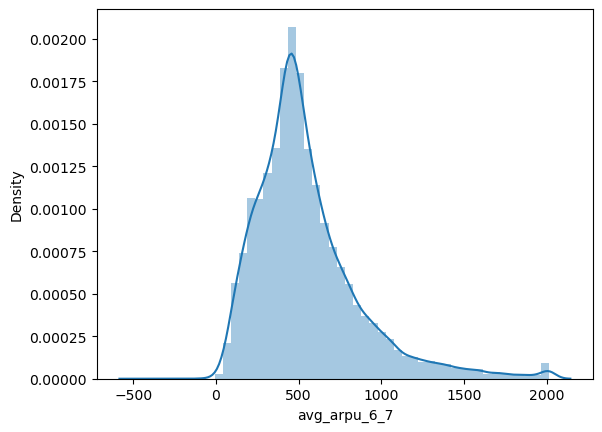

In [138]:
# Plot the distribution of the average ARPU for months 6 and 7 to visualize its frequency distribution
sns.distplot(train_data_filtered1['avg_arpu_6_7'])
plt.show()

**Observation:** The distribution of the average ARPU for months 6 and 7 appears to be normal (Gaussian), characterized by a bell-shaped curve with a peak at the center. This indicates that most customers have an average ARPU close to the mean, with a gradual decrease in frequency as values move further away from the center. This normal distribution suggests that the average ARPU is relatively consistent among customers, with fewer customers having extremely high or low average ARPU values.

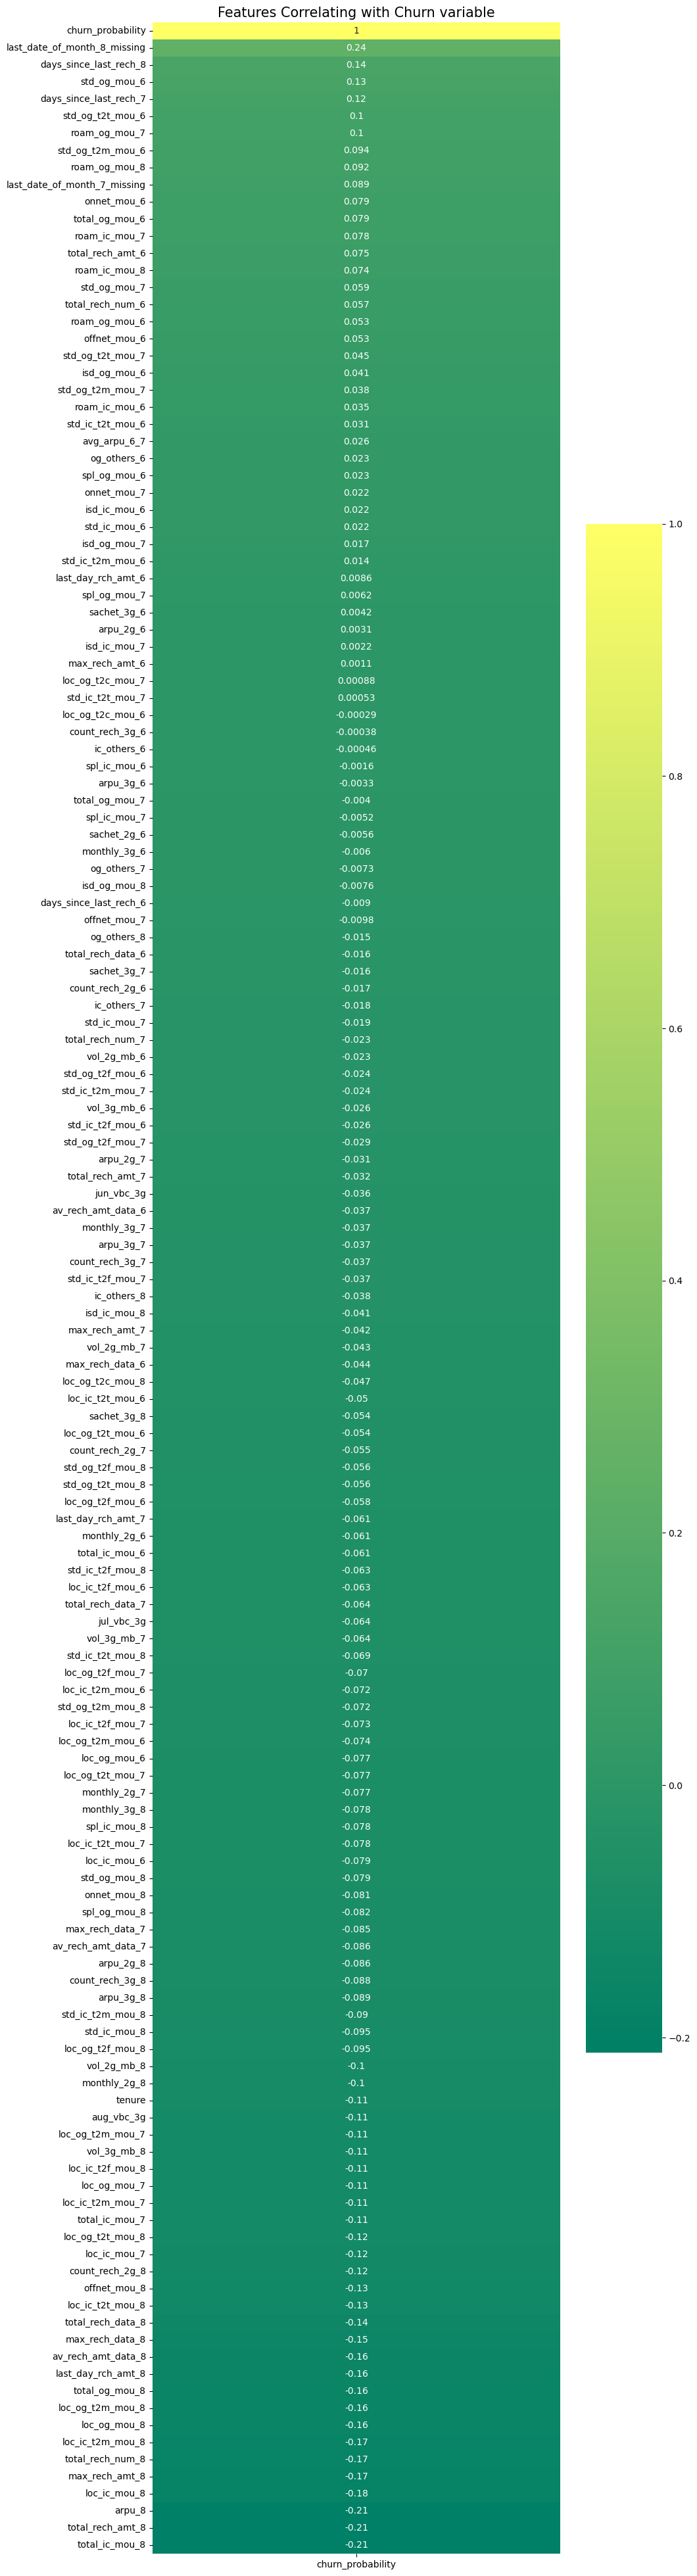

In [140]:
# Checking Correlation between target variable(churn_probability) with the other variable in the dataset
# Filter numeric columns
numeric_cols = train_data_filtered1.select_dtypes(include=[np.number]).columns

# Checking correlation between target variable (churn_probability) with other numeric variables
plt.figure(figsize=(10, 50))
heatmap_churn = sns.heatmap(train_data_filtered1[numeric_cols].corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'), 
                            annot=True, cmap='summer')

heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)
plt.show()

In [141]:
# Select only numeric columns from the dataset
numeric_cols = train_data_filtered1.select_dtypes(include=[np.number])

# Compute the correlation matrix using only the numeric columns
corr_matrix = numeric_cols.corr()

# Extract correlations with the target variable 'churn_probability'
churn_corr = corr_matrix[['churn_probability']].sort_values(by='churn_probability', ascending=False)

# Display the correlation DataFrame
churn_corr

,churn_probability
churn_probability,1.000000
last_date_of_month_8_missing,0.242607
days_since_last_rech_8,0.135037
std_og_mou_6,0.132509
days_since_last_rech_7,0.115444
std_og_t2t_mou_6,0.102099
roam_og_mou_7,0.101239
std_og_t2m_mou_6,0.094245
roam_og_mou_8,0.091932
last_date_of_month_7_missing,0.088980


#### Why Binning `total_rech_data_8` and `total_rech_num_8`?

1. **Simplifies Analysis:** Binning helps identify patterns more easily by grouping continuous values into categories, making the data more interpretable.
2. **Improves Model Performance:** It captures non-linear relationships better and can improve the predictive power of models by creating more meaningful features.
3. **Enhances Interpretability:** Categories like "No_Recharge" and "10-25_Recharges" provide actionable insights for understanding customer behavior and churn risk.
4. **Data Handling:** Binning manages missing or zero recharge values more effectively and reduces the impact of outliers.

#### Why select `total_rech_data_8` and `total_rech_num_8`?

These variables are key indicators of customer engagement and activity in the final month (Month 8). Fewer recharges in this period could indicate a higher likelihood of churn, making them important factors for churn prediction.

In [143]:
#Creating categories for month 8 column totalrecharge and their count - Train dataset
train_data_filtered1['total_rech_data_group_8']=pd.cut(train_data_filtered1['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
train_data_filtered1['total_rech_num_group_8']=pd.cut(train_data_filtered1['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

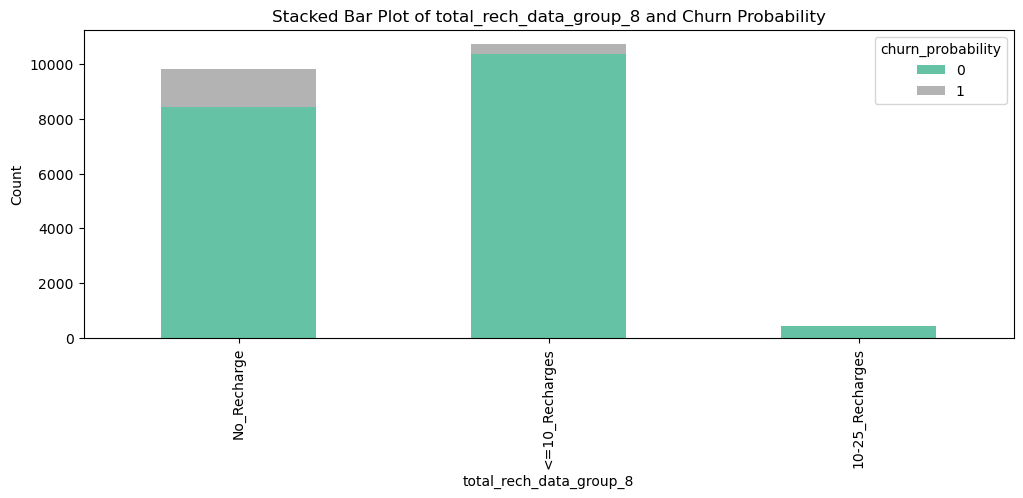

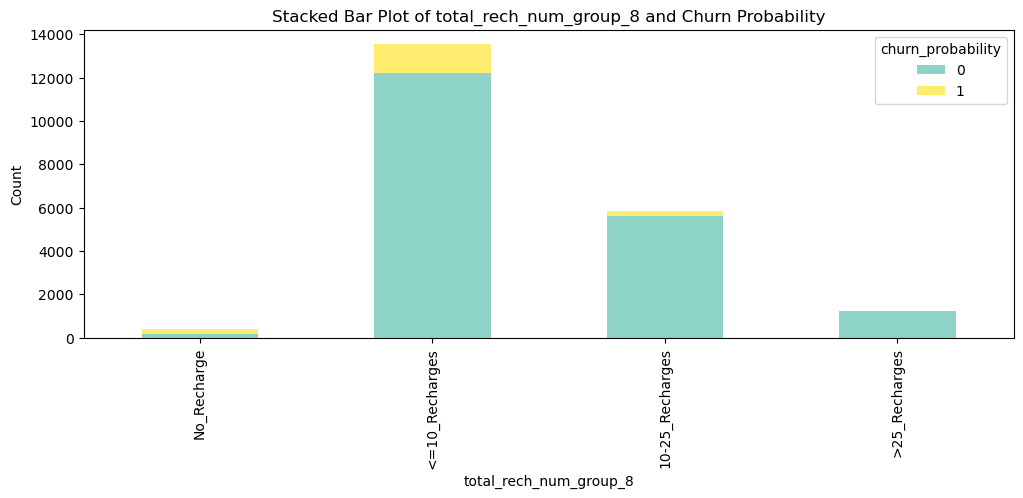

In [144]:
# Stacked bar plot for total_rech_data_group_8 - Train dataset
pd.crosstab(train_data_filtered1['total_rech_data_group_8'], train_data_filtered1['churn_probability']).plot(
    kind='bar', stacked=True, figsize=(12, 4), colormap='Set2')
plt.title('Stacked Bar Plot of total_rech_data_group_8 and Churn Probability')
plt.ylabel('Count')
plt.show()

# Stacked bar plot for total_rech_num_group_8 - Train dataset
pd.crosstab(train_data_filtered1['total_rech_num_group_8'], train_data_filtered1['churn_probability']).plot(
    kind='bar', stacked=True, figsize=(12, 4), colormap='Set3')
plt.title('Stacked Bar Plot of total_rech_num_group_8 and Churn Probability')
plt.ylabel('Count')
plt.show()


In [145]:
# Crosstab for total_rech_data_group_8 and churn_probability
total_rech_data_group_8_df = pd.crosstab(train_data_filtered1['total_rech_data_group_8'], train_data_filtered1['churn_probability'])

# Crosstab for total_rech_num_group_8 and churn_probability
total_rech_num_group_8_df = pd.crosstab(train_data_filtered1['total_rech_num_group_8'], train_data_filtered1['churn_probability'])

# Display the data
print("Crosstab DataFrame for total_rech_data_group_8:")
print(total_rech_data_group_8_df)

print("\nCrosstab DataFrame for total_rech_num_group_8:")
print(total_rech_num_group_8_df)


Crosstab DataFrame for total_rech_data_group_8:
churn_probability            0     1
total_rech_data_group_8             
No_Recharge               8434  1399
<=10_Recharges           10392   337
10-25_Recharges            448     3

Crosstab DataFrame for total_rech_num_group_8:
churn_probability           0     1
total_rech_num_group_8             
No_Recharge               168   228
<=10_Recharges          12236  1297
10-25_Recharges          5643   186
>25_Recharges            1227    28


#### Observations from Crosstab DataFrames

#### For `total_rech_data_group_8`:
- The majority of users who did not recharge their data in Month 8 fall into the churn category, with **8434** users not churning and **1399** users churning.
- Users who recharged with fewer than 10 data recharges are the next largest group, with **10392** users not churning and **337** users churning.
- Very few users fall into the higher data recharge group (10-25 recharges), with **448** not churning and only **3** churning. 

This indicates that users with little to no data recharges in Month 8 are more likely to churn.

#### For `total_rech_num_group_8`:
- The group with no total recharges shows **168** users not churning and **228** users churning, indicating a high churn likelihood among users who did not recharge at all.
- Users with fewer than 10 total recharges are the largest group, with **12236** users not churning and **1297** churning.
- The group with 10-25 recharges has **5643** users not churning and **186** users churning.
- Finally, users with more than 25 recharges have the lowest churn rate, with **1227** users not churning and only **28** churning.

Overall, the data suggests that users who have lower recharge activity (both data and total recharges) are more likely to churn.


In [147]:
# Creating categories for month 8 column totalrecharge and their count - Test dataset
unseen['total_rech_data_group_8']=pd.cut(unseen['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
unseen['total_rech_num_group_8']=pd.cut(unseen['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

In [148]:
# Dropping the original columns - train dataset
train_data_filtered1.drop(['total_rech_data_8', 'total_rech_num_8'], axis=1, inplace=True)

In [149]:
# Dropping the original columns - test dataset
unseen.drop(['total_rech_data_8', 'total_rech_num_8'], axis=1, inplace=True)

In [150]:
# Select only numeric columns from the dataset
numeric_cols = train_data_filtered1.select_dtypes(include=[np.number])

# Compute the correlation matrix using only the numeric columns
corr_matrix = numeric_cols.corr()

# Extract correlations with the target variable 'churn_probability'
churn_corr = corr_matrix[['churn_probability']].sort_values(by='churn_probability', ascending=False)

# Display the correlation DataFrame
churn_corr

,churn_probability
churn_probability,1.000000
last_date_of_month_8_missing,0.242607
days_since_last_rech_8,0.135037
std_og_mou_6,0.132509
days_since_last_rech_7,0.115444
std_og_t2t_mou_6,0.102099
roam_og_mou_7,0.101239
std_og_t2m_mou_6,0.094245
roam_og_mou_8,0.091932
last_date_of_month_7_missing,0.088980


#### Dropping Features with Low Correlation

Features with very low or negative correlation with the target variable (`churn_probability`) may not provide valuable predictive power in the model. These features contribute less to predicting churn and can introduce noise into the model. 

We should focus on features with absolute correlations closer to 1, as they have a stronger relationship with the target. Therefore, features with low or negative correlations will be dropped from the dataset to improve model performance and reduce dimensionality.

**Rationale**:
- Low correlation: These features do not have a strong relationship with the target variable.
- Negative correlation: These features show an inverse relationship with churn, which may not align with the business objective or model interpretability.

In [152]:
# List of features to drop based on low/negative correlation
features_to_drop = [
    'max_rech_data_8', 'av_rech_amt_data_8', 'last_day_rch_amt_8', 'total_og_mou_8',
    'loc_og_t2m_mou_8', 'loc_og_mou_8', 'loc_ic_t2m_mou_8', 'max_rech_amt_8',
    'loc_ic_mou_8', 'arpu_8', 'total_rech_amt_8', 'total_ic_mou_8',
    'aug_vbc_3g', 'vol_3g_mb_8', 'vol_2g_mb_8', 'monthly_2g_8', 'monthly_3g_8',
    'av_rech_amt_data_7', 'arpu_2g_8', 'arpu_3g_8', 'count_rech_3g_8',
    'arpu_3g_7', 'count_rech_2g_6', 'vol_2g_mb_7', 'vol_3g_mb_7',
    'jun_vbc_3g', 'last_day_rch_amt_7', 'monthly_3g_6', 'sachet_2g_6', 
    'loc_og_t2m_mou_7'
]

In [153]:
# Drop the features from the train dataset
train_data_filtered1.drop(features_to_drop, axis=1, inplace=True)

In [154]:
# Drop the features from the test dataset
unseen.drop(features_to_drop, axis=1, inplace=True)

#### Calculating Churn Rate

The churn rate is a critical metric in customer retention analysis. It represents the percentage of customers who have stopped using a service or product during a specific time period. Here's why it's important to calculate:

In [156]:
churn_rate = (sum(train_data_filtered1["churn_probability"])/len(train_data_filtered1["churn_probability"].index))*100
churn_rate

8.275829248560415

In [157]:
### Checking Missing Values
print(train_data_filtered1.isnull().sum())

onnet_mou_6                        0
onnet_mou_7                        0
onnet_mou_8                        0
offnet_mou_6                       0
offnet_mou_7                       0
offnet_mou_8                       0
roam_ic_mou_6                      0
roam_ic_mou_7                      0
roam_ic_mou_8                      0
roam_og_mou_6                      0
roam_og_mou_7                      0
roam_og_mou_8                      0
loc_og_t2t_mou_6                   0
loc_og_t2t_mou_7                   0
loc_og_t2t_mou_8                   0
loc_og_t2m_mou_6                   0
loc_og_t2f_mou_6                   0
loc_og_t2f_mou_7                   0
loc_og_t2f_mou_8                   0
loc_og_t2c_mou_6                   0
loc_og_t2c_mou_7                   0
loc_og_t2c_mou_8                   0
loc_og_mou_6                       0
loc_og_mou_7                       0
std_og_t2t_mou_6                   0
std_og_t2t_mou_7                   0
std_og_t2t_mou_8                   0
s

#### Handling Missing Values

**Columns to Drop:**

- **`tenure_range`**: This column has 4996 missing values, which constitutes a significant portion of the data. As the missing data cannot be effectively imputed or if the column does not contribute valuable information, it is practical to drop it from the dataset.

In [159]:
# Drop the 'tenure_range' column due to a high percentage of missing values - Train dataset
train_data_filtered1 = train_data_filtered1.drop(columns=['tenure_range'])

In [160]:
# Drop the 'tenure_range' column due to a high percentage of missing values - Test dataset
unseen = unseen.drop(columns=['tenure_range'])

In [161]:
# Checking train dataset shape before splitting
train_data_filtered1.shape

(21013, 124)

In [162]:
# Checking train dataset shape before splitting
unseen.shape

(30000, 124)

# Step 4: Model Building and Evaluation

In [164]:
# Define features and targe
X = train_data_filtered1.drop("churn_probability", axis = 1)
y = train_data_filtered1.churn_probability

In [165]:
# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 4)

In [166]:
# Checking the shape after split
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_val Shape:', X_val.shape)
print('y_val Shape:', y_val.shape)

X_train Shape: (16810, 123)
y_train Shape: (16810,)
X_val Shape: (4203, 123)
y_val Shape: (4203,)


In [167]:
# Target Variable Distribution
y_train.value_counts()

0    15399
1     1411
Name: churn_probability, dtype: int64

In [168]:
# Target Variable Info
y_train.info(verbose=1)

<class 'pandas.core.series.Series'>
Int64Index: 16810 entries, 1403 to 17530
Series name: churn_probability
Non-Null Count  Dtype
--------------  -----
16810 non-null  int32
dtypes: int32(1)
memory usage: 197.0 KB


#### Target Variable Distribution

The distribution of the target variable `churn_probability` in the training dataset is as follows:

- **Class 0.000000 (Non-Churned)**: 15,399 samples
- **Class 0.909328 (Churned)**: 1,411 samples

This distribution indicates an imbalance between the two classes, with the non-churned class significantly more prevalent than the churned class. This imbalance should be taken into consideration when designing and evaluating the model, as it may affect the performance metrics and model training process.

In [170]:
# Define numerical and categorical columns
num_col = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = ['total_rech_data_group_8', 'total_rech_num_group_8', 
                     'fb_user_6', 'fb_user_7', 'fb_user_8', 
                     'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']

#### Why Use a Pipeline?

Using a pipeline in machine learning provides several benefits:

1. **Consistency**: Ensures that the same preprocessing steps are applied to all datasets (training, validation, test), preventing inconsistencies.

2. **Simplification**: Combines preprocessing and model training into a single step, making the workflow cleaner and easier to manage.

3. **Prevents Data Leakage**: Applies preprocessing only within the training set and then consistently to the test set, avoiding leakage of information.

4. **Maintainability**: Makes code easier to maintain and modify by encapsulating preprocessing and modeling into a single unit.

In [172]:
# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

#### Addressing Class Imbalance with Synthetic Minority Over-sampling Technique (SMOTE). This technique generates synthetic samples for the minority class to create a more balanced dataset. In this step, we apply SMOTE to the training data to obtain resampled features (`X_train_sm`) and target labels (`y_train_sm`).

In [174]:
# Transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)
unseen_transformed = preprocessor.transform(unseen)

In [175]:
# Step 2: Extract column names before applying SMOTE
# Numeric columns + OneHotEncoded categorical column names
required_columns = num_col + list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols))

In [176]:
# Apply SMOTE to balance the classes
smt = SMOTE(random_state=4)
X_train_sm, y_train_sm = smt.fit_resample(X_train_transformed, y_train)

In [177]:
# Convert the SMOTE output to DataFrame to match the columns
X_train_sm_df = pd.DataFrame(X_train_sm, columns=num_col + list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols)))

In [178]:
X_train_sm_df.columns

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6',
       ...
       'fb_user_8_1.0', 'night_pck_user_6_-1.0', 'night_pck_user_6_0.0',
       'night_pck_user_6_1.0', 'night_pck_user_7_-1.0', 'night_pck_user_7_0.0',
       'night_pck_user_7_1.0', 'night_pck_user_8_-1.0', 'night_pck_user_8_0.0',
       'night_pck_user_8_1.0'],
      dtype='object', length=140)

In [179]:
# Convert transformed validation data to DataFrame
X_val_df = pd.DataFrame(X_val_transformed, columns=required_columns)

In [180]:
# Convert the transformed unseen data to DataFrame
unseen_transformed_df = pd.DataFrame(unseen_transformed, columns=num_col + list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols)))

In [181]:
# Ensure all columns are present in validation and unseen DataFrames
for col in X_train_sm_df.columns:
    if col not in X_val_df.columns:
        X_val_df[col] = 0
    if col not in unseen_transformed_df.columns:
        unseen_transformed_df[col] = 0

In [182]:
# Reorder columns to match the training data
X_val_df = X_val_df[X_train_sm_df.columns]
unseen_transformed_df = unseen_transformed_df[X_train_sm_df.columns]

In [183]:
# Print the shape of the resampled training feature set after applying SMOTE
# This shows the number of samples and features in the resampled training data
X_train_sm_df.shape

(30798, 140)

In [184]:
# Print the shape of the resampled training target set after applying SMOTE
# This shows the number of samples in the resampled target data
y_train_sm.shape

(30798,)

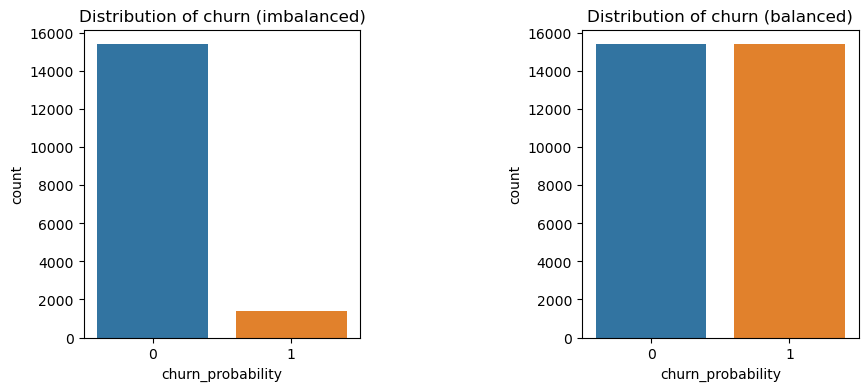

In [185]:
# Checking the distribution on our target variable 'y_train' before and after SMOTE
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title("Distribution of churn (imbalanced)")
sns.countplot(x=y_train)

plt.subplot(1,2,2)
plt.title("Distribution of churn (balanced)")
sns.countplot(x=y_train_sm)

plt.subplots_adjust(wspace=0.8)
plt.show()

#### calculate_classification_metrics Function:

In [187]:
# Calculate Classification Metrics: Accuracy, Sensitivity, Specificity, Precision, and Rates
def calculate_classification_metrics(y_true, y_pred):
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix')
    print()
    print(cm)
    
    # True Positives, False Positives, True Negatives, False Negatives
    TP = cm[1, 1]
    FP = cm[0, 1]
    TN = cm[0, 0]
    FN = cm[1, 0]

    # Accuracy Score
    accuracy = round((TP + TN) / (TP + FP + TN + FN), 4)

    # Sensitivity (Recall or True Positive Rate)
    sensitivity = round(TP / (TP + FN), 4)

    # Specificity
    specificity = round(TN / (TN + FP), 4)

    # Precision
    precision = round(TP / (TP + FP), 4)

    # False Positive Rate
    false_positive_rate = round(FP / (FP + TN), 4)

    # True Positive Rate
    true_positive_rate = sensitivity

    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'False Positive Rate', 'True Positive Rate'],
        'Value': [accuracy, sensitivity, specificity, precision, false_positive_rate, true_positive_rate]
    })

    return metrics_df

#### draw_roc Function

In [189]:
#Plot ROC Curve and Calculate AUC Score
def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs,drop_intermediate = False)
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

### Model 1. Logistic Regression with Recursive Feature Elimination (RFE)

In [191]:
# Step 1: Define the Logistic Regression model
lr = LogisticRegression(max_iter=1000)

In [192]:
# Step 2: Apply Recursive Feature Elimination (RFE)
rfe = RFE(lr, n_features_to_select=20)  # Select 15 features for this example
X_train_rfe = rfe.fit_transform(X_train_sm_df, y_train_sm)
X_val_rfe = rfe.transform(X_val_transformed)

In [193]:
# Step 3: Train the model
lr.fit(X_train_rfe, y_train_sm)

LogisticRegression(max_iter=1000)

In [194]:
# Step 4: Make predictions
y_train_pred_rfe = lr.predict(X_train_rfe)
y_val_pred_rfe = lr.predict(X_val_rfe)


In [195]:
#Step 5: Evaluate the model
print("Train Metrics")
calculate_classification_metrics(y_train_sm, y_train_pred_rfe)


Train Metrics
Confusion Matrix

[[12731  2668]
 [ 2398 13001]]


,Metric,Value
0,Accuracy,0.8355
1,Sensitivity,0.8443
2,Specificity,0.8267
3,Precision,0.8297
4,False Positive Rate,0.1733
5,True Positive Rate,0.8443


In [196]:
print("Validation Metrics")
calculate_classification_metrics(y_val, y_val_pred_rfe)


Validation Metrics
Confusion Matrix

[[3185  690]
 [  68  260]]


,Metric,Value
0,Accuracy,0.8197
1,Sensitivity,0.7927
2,Specificity,0.8219
3,Precision,0.2737
4,False Positive Rate,0.1781
5,True Positive Rate,0.7927


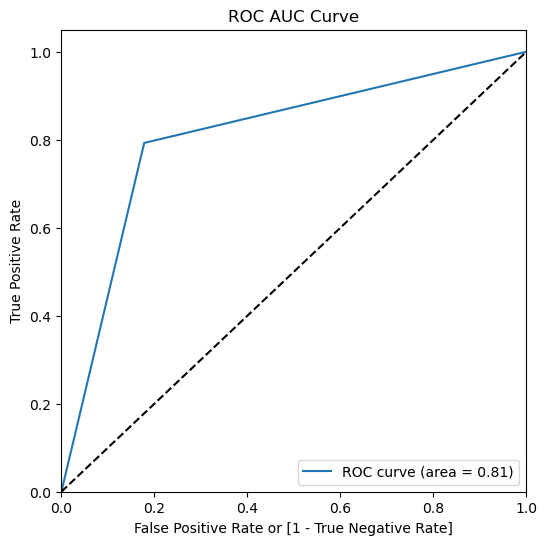

In [197]:
#ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred_rfe)


# Model 2 - Logistic Regression with PCA and Hyperparameter Tuning

In [199]:
# Step 1: Apply PCA
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_sm_df)
X_val_pca = pca.transform(X_val_transformed)

In [200]:
# Step 2: Logistic Regression with Hyperparameter Tuning
params = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2']}
lr = LogisticRegression(max_iter=1000)
grid_search_lr = GridSearchCV(estimator=lr, param_grid=params, cv=3, scoring='accuracy')

In [201]:
# Step 3: Train the model
grid_search_lr.fit(X_train_pca, y_train_sm)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2']},
             scoring='accuracy')

In [202]:
# Step 4: Make predictions
y_train_pred_pca = grid_search_lr.predict(X_train_pca)
y_val_pred_pca = grid_search_lr.predict(X_val_pca)

In [203]:
# Step 5: Evaluate the model
print("Train Metrics")
calculate_classification_metrics(y_train_sm, y_train_pred_pca)

Train Metrics
Confusion Matrix

[[11785  3614]
 [ 3573 11826]]


,Metric,Value
0,Accuracy,0.7666
1,Sensitivity,0.7680
2,Specificity,0.7653
3,Precision,0.7659
4,False Positive Rate,0.2347
5,True Positive Rate,0.7680


In [204]:
print("Validation Metrics")
calculate_classification_metrics(y_val, y_val_pred_pca)

Validation Metrics
Confusion Matrix

[[2942  933]
 [  79  249]]


,Metric,Value
0,Accuracy,0.7592
1,Sensitivity,0.7591
2,Specificity,0.7592
3,Precision,0.2107
4,False Positive Rate,0.2408
5,True Positive Rate,0.7591


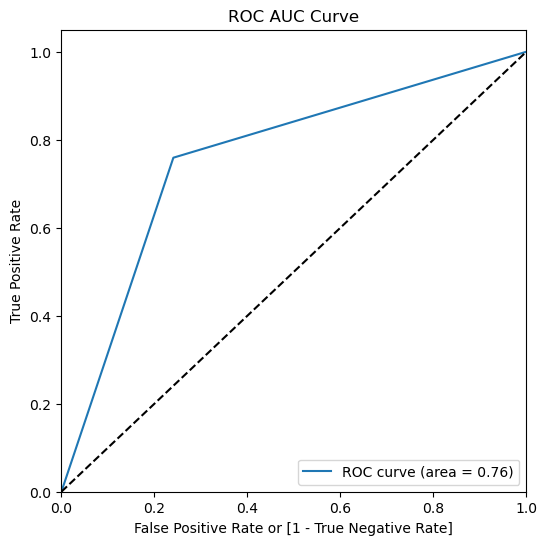

In [205]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred_pca)

# Model 3 - Decision Tree with PCA and GridSearchCV

In [207]:
# Step 1: Define the Decision Tree model
dt = DecisionTreeClassifier()

In [208]:
# Step 2: Hyperparameter Tuning with GridSearchCV
params = {'max_depth': [3, 5, 10], 'min_samples_leaf': [50, 100]}
grid_search_dt = GridSearchCV(estimator=dt, param_grid=params, cv=3, scoring='accuracy')

In [209]:
# Step 3: Train the model
grid_search_dt.fit(X_train_pca, y_train_sm)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_leaf': [50, 100]},
             scoring='accuracy')

In [210]:
# Step 4: Make predictions
y_train_pred_dt = grid_search_dt.predict(X_train_pca)
y_val_pred_dt = grid_search_dt.predict(X_val_pca)

In [211]:
# Step 5: Evaluate the model
print("Train Metrics")
calculate_classification_metrics(y_train_sm, y_train_pred_dt)

Train Metrics
Confusion Matrix

[[12629  2770]
 [ 2514 12885]]


,Metric,Value
0,Accuracy,0.8284
1,Sensitivity,0.8367
2,Specificity,0.8201
3,Precision,0.8231
4,False Positive Rate,0.1799
5,True Positive Rate,0.8367


In [212]:
print("Validation Metrics")
calculate_classification_metrics(y_val, y_val_pred_dt)

Validation Metrics
Confusion Matrix

[[3081  794]
 [ 107  221]]


,Metric,Value
0,Accuracy,0.7856
1,Sensitivity,0.6738
2,Specificity,0.7951
3,Precision,0.2177
4,False Positive Rate,0.2049
5,True Positive Rate,0.6738


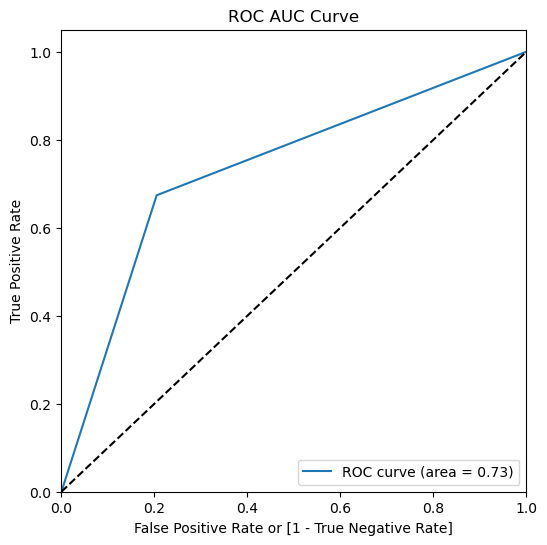

In [213]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred_dt)

# Model 4 - Random Forest with PCA and Hyperparameter Tuning

In [215]:
# Step 1: Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

In [216]:
# Step 2: Hyperparameter Tuning
params = {'n_estimators': [100, 200], 'max_depth': [5, 10], 'min_samples_leaf': [50, 100]}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=params, cv=3, scoring='accuracy')

In [217]:
# Step 3: Train the model
grid_search_rf.fit(X_train_pca, y_train_sm)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10], 'min_samples_leaf': [50, 100],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [218]:
# Step 4: Make predictions
y_train_pred_rf = grid_search_rf.predict(X_train_pca)
y_val_pred_rf = grid_search_rf.predict(X_val_pca)

In [219]:
# Step 5: Evaluate the model
print("Train Metrics")
calculate_classification_metrics(y_train_sm, y_train_pred_rf)

Train Metrics
Confusion Matrix

[[13376  2023]
 [ 2863 12536]]


,Metric,Value
0,Accuracy,0.8414
1,Sensitivity,0.8141
2,Specificity,0.8686
3,Precision,0.8610
4,False Positive Rate,0.1314
5,True Positive Rate,0.8141


In [220]:
print("Validation Metrics")
calculate_classification_metrics(y_val, y_val_pred_rf)

Validation Metrics
Confusion Matrix

[[3322  553]
 [ 101  227]]


,Metric,Value
0,Accuracy,0.8444
1,Sensitivity,0.6921
2,Specificity,0.8573
3,Precision,0.2910
4,False Positive Rate,0.1427
5,True Positive Rate,0.6921


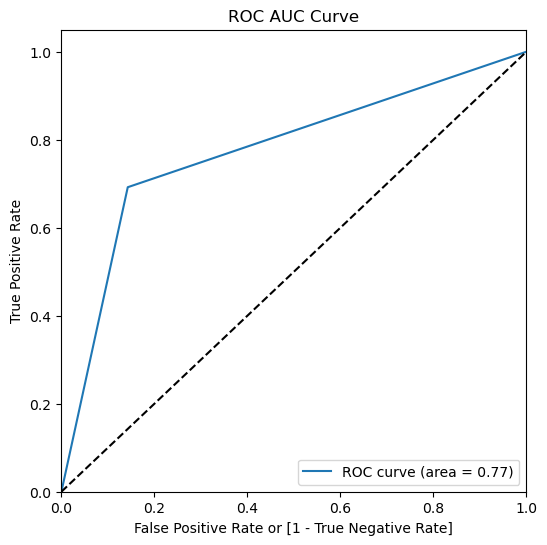

In [221]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred_rf)

# Model 5 - AdaBoost Classifier

In [223]:
# Step 1: Define the AdaBoost model
ada = AdaBoostClassifier(random_state=42)

In [224]:
# Step 2: Train the model
ada.fit(X_train_sm_df, y_train_sm)

AdaBoostClassifier(random_state=42)

In [225]:
# Step 3: Make predictions
y_train_pred_ada = ada.predict(X_train_sm_df)
y_val_pred_ada = ada.predict(X_val_transformed)

In [226]:
# Step 4: Evaluate the model
print("Train Metrics")
calculate_classification_metrics(y_train_sm, y_train_pred_ada)

Train Metrics
Confusion Matrix

[[14169  1230]
 [ 1112 14287]]


,Metric,Value
0,Accuracy,0.9240
1,Sensitivity,0.9278
2,Specificity,0.9201
3,Precision,0.9207
4,False Positive Rate,0.0799
5,True Positive Rate,0.9278


In [227]:
print("Validation Metrics")
calculate_classification_metrics(y_val, y_val_pred_ada)

Validation Metrics
Confusion Matrix

[[3545  330]
 [  94  234]]


,Metric,Value
0,Accuracy,0.8991
1,Sensitivity,0.7134
2,Specificity,0.9148
3,Precision,0.4149
4,False Positive Rate,0.0852
5,True Positive Rate,0.7134


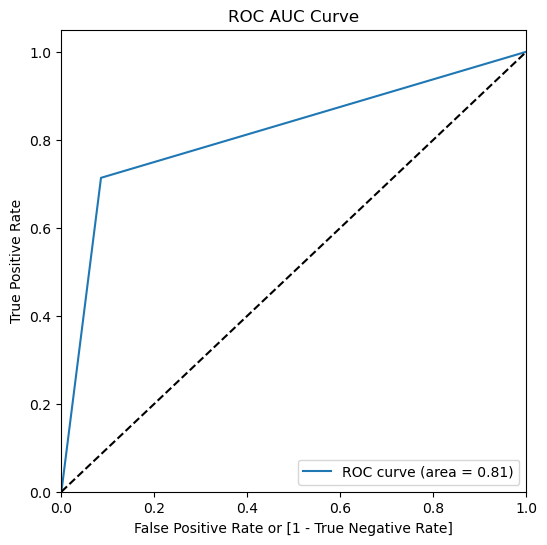

In [228]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred_ada)

# Model 6 - Gradient Boosting Classifier

In [230]:
# Step 1: Define the Gradient Boosting model
gbm = GradientBoostingClassifier(random_state=42)

# Step 2: Train the model
gbm.fit(X_train_sm_df, y_train_sm)

# Step 3: Make predictions
y_train_pred_gbm = gbm.predict(X_train_sm_df)
y_val_pred_gbm = gbm.predict(X_val_transformed)

In [231]:
# Step 4: Evaluate the model
print("Train Metrics")
calculate_classification_metrics(y_train_sm, y_train_pred_gbm)

Train Metrics
Confusion Matrix

[[14564   835]
 [  728 14671]]


,Metric,Value
0,Accuracy,0.9492
1,Sensitivity,0.9527
2,Specificity,0.9458
3,Precision,0.9461
4,False Positive Rate,0.0542
5,True Positive Rate,0.9527


In [232]:
print("Validation Metrics")
calculate_classification_metrics(y_val, y_val_pred_gbm)

Validation Metrics
Confusion Matrix

[[3636  239]
 [ 100  228]]


,Metric,Value
0,Accuracy,0.9193
1,Sensitivity,0.6951
2,Specificity,0.9383
3,Precision,0.4882
4,False Positive Rate,0.0617
5,True Positive Rate,0.6951


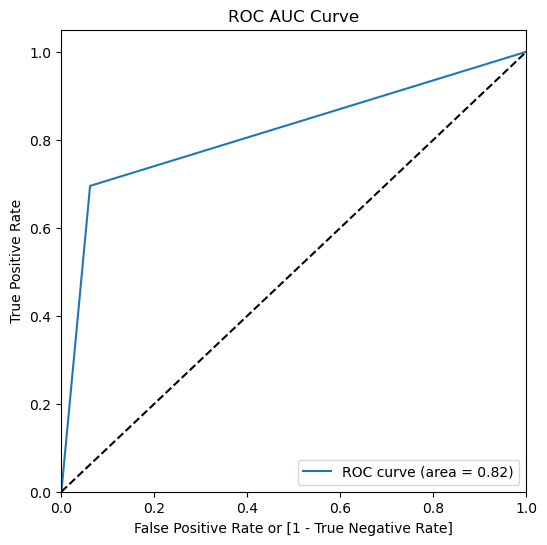

In [233]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred_gbm)

# Model 7 - XGBoost model

In [235]:
# Convert the transformed validation data to DataFrame
X_train_sm_df.columns = X_train_sm_df.columns.str.replace('[\[\]<]', '', regex=True)
unseen_transformed_df.columns = unseen_transformed_df.columns.str.replace('[\[\]<]', '', regex=True)

In [236]:
# Create a DataFrame with the same columns as training data
X_val_df = pd.DataFrame(X_val_transformed, columns=num_col + list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols)))

# Ensure all columns are present in validation and unseen DataFrames
for col in X_train_sm_df.columns:
    if col not in X_val_df.columns:
        X_val_df[col] = 0
    if col not in unseen_transformed_df.columns:
        unseen_transformed_df[col] = 0
        
# Reorder columns to match the training data
X_val_df = X_val_df[X_train_sm_df.columns]
unseen_transformed_df = unseen_transformed_df[X_train_sm_df.columns]

In [237]:
import xgboost as xgb
# Step 1: Define the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Step 2: Train the model
xgb_model.fit(X_train_sm_df, y_train_sm)

# Step 3: Make predictions
y_train_pred_xgb = xgb_model.predict(X_train_sm_df)
y_val_pred_xgb = xgb_model.predict(X_val_df)

In [238]:
# Step 4: Evaluate the model
print("Train Metrics")
calculate_classification_metrics(y_train_sm, y_train_pred_xgb)

Train Metrics
Confusion Matrix

[[15388    11]
 [   10 15389]]


,Metric,Value
0,Accuracy,0.9993
1,Sensitivity,0.9994
2,Specificity,0.9993
3,Precision,0.9993
4,False Positive Rate,0.0007
5,True Positive Rate,0.9994


In [239]:
print("Validation Metrics")
calculate_classification_metrics(y_val, y_val_pred_xgb)

Validation Metrics
Confusion Matrix

[[3741  134]
 [ 133  195]]


,Metric,Value
0,Accuracy,0.9365
1,Sensitivity,0.5945
2,Specificity,0.9654
3,Precision,0.5927
4,False Positive Rate,0.0346
5,True Positive Rate,0.5945


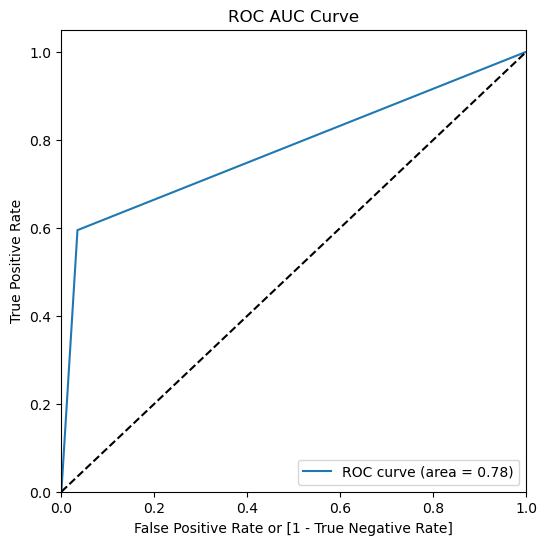

In [240]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred_xgb)

# Model 8 - StackingClassifier,LogisticRegression,RandomForestClassifier

In [242]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define base models
base_models = [
    ('gbm', GradientBoostingClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False)),
    ('rf', RandomForestClassifier(random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression()

# Define the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier
stacking_clf.fit(X_train_sm_df, y_train_sm)

# Make predictions
y_train_pred_stack = stacking_clf.predict(X_train_sm_df)
y_val_pred_stack = stacking_clf.predict(X_val_df)


In [243]:
# Step 4: Evaluate the model
print("Train Metrics")
calculate_classification_metrics(y_train_sm, y_train_pred_stack)

Train Metrics
Confusion Matrix

[[15399     0]
 [    0 15399]]


,Metric,Value
0,Accuracy,1.0
1,Sensitivity,1.0
2,Specificity,1.0
3,Precision,1.0
4,False Positive Rate,0.0
5,True Positive Rate,1.0


In [244]:
print("Validation Metrics")
calculate_classification_metrics(y_val,y_val_pred_stack)

Validation Metrics
Confusion Matrix

[[3772  103]
 [ 132  196]]


,Metric,Value
0,Accuracy,0.9441
1,Sensitivity,0.5976
2,Specificity,0.9734
3,Precision,0.6555
4,False Positive Rate,0.0266
5,True Positive Rate,0.5976


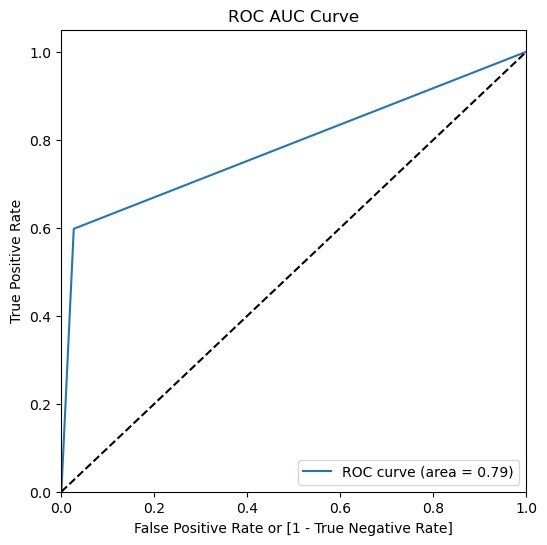

In [245]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred_stack)

### Creating submission file

In [247]:
# Convert the SMOTE output to DataFrame with appropriate column names
X_train_sm_df = pd.DataFrame(X_train_sm, columns=required_columns) 

In [248]:
# Predict churn probabilities using the trained stacking classifier
unseen['churn_probability'] = stacking_clf.predict(unseen_transformed_df)

In [249]:
# Select the required columns for submission
output = unseen[['id', 'churn_probability']]
output

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,0
29998,99997,0


In [250]:
# Save the output for submission
output.to_csv('submission.csv', index=False)

In [255]:
# Extract individual model importances directly from the stacking classifier
importances_rf = stacking_clf.named_estimators_['rf'].feature_importances_
importances_gbm = stacking_clf.named_estimators_['gbm'].feature_importances_

# Combine the importances into a DataFrame
importances_df = pd.DataFrame({
    'Feature': X_train_sm_df.columns,
    'Importance_RF': importances_rf,
    'Importance_GBM': importances_gbm
})

# Calculate average importance
importances_df['Combined_Importance'] = (importances_df['Importance_RF'] + importances_df['Importance_GBM']) / 2

# Sort and display
importances_df = importances_df.sort_values(by='Combined_Importance', ascending=False)
print(importances_df.head(10))


                                 Feature  Importance_RF  Importance_GBM  \
130                        fb_user_8_1.0       0.032531        0.129439   
5                           offnet_mou_8       0.033292        0.110238   
11                         roam_og_mou_8       0.040685        0.083335   
110               days_since_last_rech_8       0.034658        0.086761   
117  total_rech_data_group_8_No_Recharge       0.039353        0.053476   
8                          roam_ic_mou_8       0.034017        0.056135   
49                      loc_ic_t2t_mou_8       0.031576        0.054303   
14                      loc_og_t2t_mou_8       0.036458        0.047985   
137                night_pck_user_8_-1.0       0.040061        0.043328   
128                       fb_user_8_-1.0       0.030339        0.038554   

     Combined_Importance  
130             0.080985  
5               0.071765  
11              0.062010  
110             0.060709  
117             0.046414  
8           

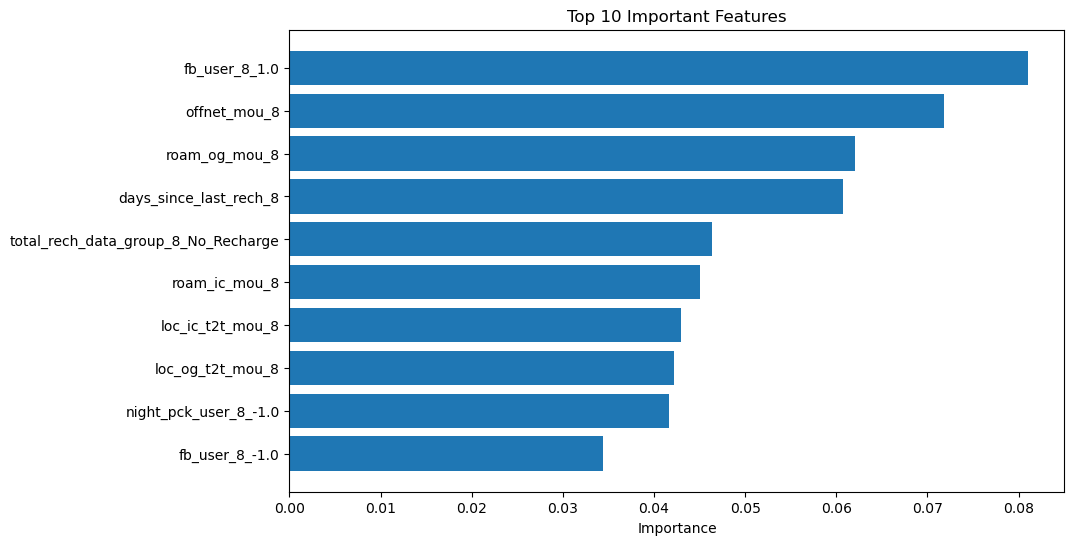

In [261]:
# Plot top 10 important features
top_features = importances_df.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Combined_Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

# Churn Prediction Model Evaluation and Strategy Recommendations

## Feature Importance

To identify the main drivers of customer churn, we evaluated feature importance using two models: Random Forest (RF) and Gradient Boosting Machine (GBM). The combined importance of these features helps us understand which variables are strong predictors of churn and could indicate why customers might switch to other networks.

### Top Features by Importance

| Feature                                | Importance_RF | Importance_GBM | Combined_Importance |
|----------------------------------------|---------------|----------------|----------------------|
| fb_user_8_1.0                         | 0.032531      | 0.129439       | 0.080985             |
| offnet_mou_8                          | 0.033292      | 0.110238       | 0.071765             |
| roam_og_mou_8                         | 0.040685      | 0.083335       | 0.062010             |
| days_since_last_rech_8                | 0.034658      | 0.086761       | 0.060709             |
| total_rech_data_group_8_No_Recharge   | 0.039353      | 0.053476       | 0.046414             |
| roam_ic_mou_8                         | 0.034017      | 0.056135       | 0.045076             |
| loc_ic_t2t_mou_8                      | 0.031576      | 0.054303       | 0.042940             |
| loc_og_t2t_mou_8                      | 0.036458      | 0.047985       | 0.042221             |
| night_pck_user_8_-1.0                 | 0.040061      | 0.043328       | 0.041694             |
| fb_user_8_-1.0                        | 0.030339      | 0.038554       | 0.034446             |

## Evaluation Metrics

For the churn prediction model, while overall accuracy is the primary evaluation metric, other metrics are crucial depending on specific business objectives. These include:

- **Precision**: Indicates how many of the predicted churns were actual churns. Useful when the cost of a false positive (predicting churn when the customer will not churn) is high.
- **Recall**: Shows how many of the actual churns were correctly predicted. Important when missing an actual churn (false negative) has a high cost.
- **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two metrics.
- **ROC AUC**: Measures the area under the receiver operating characteristic curve, indicating the model's ability to distinguish between churners and non-churners.

For our business goal of accurately identifying customers who are likely to churn, we prioritize **recall**. This is because we want to identify as many churners as possible to take proactive retention measures. 

## Strategies to Manage Customer Churn

Based on the feature importance and model evaluation, here are some strategies to manage customer churn:

1. **Targeted Offers**: Use features like `fb_user_8_1.0` and `offnet_mou_8` to identify customers who are likely to churn and offer them targeted discounts or special plans.
2. **Improve Engagement**: Features such as `roam_og_mou_8` and `days_since_last_rech_8` suggest that customers who use roaming services or have not recharged recently are at higher risk. Implement engagement campaigns to improve their activity and satisfaction.
3. **Personalized Communication**: Based on `total_rech_data_group_8_No_Recharge` and similar features, tailor communications to address specific concerns or needs of high-risk customers.
4. **Product Enhancement**: For customers with features like `night_pck_user_8_-1.0`, consider enhancing or adding new products that align with their usage patterns.

By focusing on these areas, the company can effectively reduce churn and improve customer retention.
